# Questions
**NOTE:** "Outcomes" means PMPM score, ED score, and RDM score
## Aggregates ##
- Compare sum of aggregate values (lumpsum_aggregate) for all providers with outcomes
- Compare each aggregate value per population (total_scored or total_points?) for all providers with outcomes


## Per Metric ##
- Cluster providers based on metrics?
- Key driver analysis with each metric vs. each outcome
  - Maybe via multiple linear regression to find correlation
  - But check for multicolinearity between metrics (use PCA to deal with?)
- PCA to see if some of the metrics account for more variance
- Start with important metric, do linear regression / viz with PMPM, extend to others
- Plot _all_ metrics vs. _all_ outcomes in 3 grids of plots, look for signs


## Per Region ##
- Compare provider sum-aggregate performance with outcomes by region
- Averages per region, look for statsig



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_rows = 60
pd.options.display.max_columns = 120

# Data Cleaning
First let's load the metrics worksheet and then remove any columns that aren't useful.

In [0]:
metrics = pd.read_excel('metrics.xlsx', sheet_name=0)
metrics.head()

,EntityID,Program,Region,Population,Order,Class,ID,Name,Weight,Key_Master,Denominator,Numerator,Trend_Numerator,Gaps_Population,Predicted_Numerator,Observed,Expected,Rate,Min,Mid,Max,Metric,Points,Count,Total_Metrics,Total_Scored,Total_Points,Score,Total
0,Provider 1,TP,WPA,Adult,1,Static,QN02_3,Comprehensive Diabetes Care: Medical Attention...,1.0,QN02_3,745.0,703.0,NaN,NaN,NaN,NaN,NaN,0.94,0.90,0.92,0.97,0.7,0.7,1.0,17,11.7,11.7,69,17
1,Provider 1,TP,WPA,Adult,2,Static,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,1.0,QN02_4,745.0,498.0,NaN,NaN,NaN,NaN,NaN,0.67,0.52,0.57,0.65,1.0,1.0,1.0,17,11.7,11.7,69,17
2,Provider 1,TP,WPA,Adult,3,Static,QN08,Breast Cancer Screening,1.0,QN08,1998.0,1724.0,NaN,NaN,NaN,NaN,NaN,0.86,0.79,0.82,0.86,1.0,1.0,1.0,17,11.7,11.7,69,17
3,Provider 1,TP,WPA,Adult,4,Static,QN09,Colorectal Cancer Screening,1.0,QN09,3913.0,3186.0,NaN,NaN,NaN,NaN,NaN,0.81,0.68,0.70,0.75,1.0,1.0,1.0,17,11.7,11.7,69,17
4,Provider 1,TP,WPA,Adult,5,Static,QN10,Cervical Cancer Screening,1.0,QN10,3781.0,3081.0,NaN,NaN,NaN,NaN,NaN,0.81,0.77,0.79,0.82,0.7,0.7,1.0,17,11.7,11.7,69,17


In [0]:
metrics.columns

Index(['EntityID', 'Program', 'Region', 'Population', 'Order', 'Class', 'ID',
       'Name', 'Weight', 'Key_Master', 'Denominator', 'Numerator',
       'Trend_Numerator', 'Gaps_Population', 'Predicted_Numerator', 'Observed',
       'Expected', 'Rate', 'Min', 'Mid', 'Max', 'Metric', 'Points', 'Count',
       'Total_Metrics', 'Total_Scored', 'Total_Points', 'Score', 'Total'],
      dtype='object')

In [0]:
metrics['Metric'].value_counts(dropna=False)

NaN    25780
0.0     4916
1.0     3930
0.7     2339
0.4     1523
Name: Metric, dtype: int64

In [0]:
data = metrics.copy()
data = data[['EntityID', 'Region', 'Population', 'ID', 'Name', 'Rate', 'Score']]
data.head()

,EntityID,Region,Population,ID,Name,Rate,Score
0,Provider 1,WPA,Adult,QN02_3,Comprehensive Diabetes Care: Medical Attention...,0.94,69
1,Provider 1,WPA,Adult,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,0.67,69
2,Provider 1,WPA,Adult,QN08,Breast Cancer Screening,0.86,69
3,Provider 1,WPA,Adult,QN09,Colorectal Cancer Screening,0.81,69
4,Provider 1,WPA,Adult,QN10,Cervical Cancer Screening,0.81,69


In [0]:
#@title Select metrics for some provider { run: "auto" }
#@markdown Type a provider number, e.g. '11'

provider = '10' #@param {type:"string"}

data.groupby('EntityID').get_group(f'Provider {provider}')

,EntityID,Region,Population,ID,Name,Rate,Score
243,Provider 10,WPA,Adult,QN02_3,Comprehensive Diabetes Care: Medical Attention...,0.86,53
244,Provider 10,WPA,Adult,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,0.33,53
245,Provider 10,WPA,Adult,QN08,Breast Cancer Screening,0.83,53
246,Provider 10,WPA,Adult,QN09,Colorectal Cancer Screening,0.79,53
247,Provider 10,WPA,Adult,QN10,Cervical Cancer Screening,0.87,53
248,Provider 10,WPA,Adult,QN35,Adult BMI Assessment,0.81,53
249,Provider 10,WPA,Adult,QN36,Comprehensive Diabetes Care: HbA1c Control (<=9%),0.33,53
250,Provider 10,WPA,Adult,QN39,Medication Adherence for Diabetes Medication,0.75,53
251,Provider 10,WPA,Adult,QN40,Medication Adherence for Hypertension: RASA,0.96,53
252,Provider 10,WPA,Adult,QN41,Medication Adherence for Cholesterol (Statins),0.81,53


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38488 entries, 0 to 38487
Data columns (total 7 columns):
EntityID      38488 non-null object
Region        38488 non-null object
Population    38488 non-null object
ID            38488 non-null object
Name          38488 non-null object
Rate          35195 non-null float64
Score         38488 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.1+ MB


# Aggregate questions


In [0]:
aggs = pd.read_excel('metrics.xlsx', sheet_name=1)
aggs.head()

,EntityID,Program,Region,Population,Total_Metrics,Total_Scored,Total_Points,Total,Score,Mems,All_Mems,Att_Percent,Reimbursement,LumpSum_Aggregate,Threshold
0,Provider 1,TP,WPA,Adult,17,11.7,11.7,17,69,10117.166667,22773.250000,0.44,30.0,80,91
1,Provider 1,TP,WPA,Pediatric,8,5.4,5.4,8,68,2281.583333,22773.250000,0.10,7.0,80,91
2,Provider 1,TP,WPA,Senior,35,18.1,32.9,35,94,10374.500000,22773.250000,0.46,43.0,80,91
3,Provider 2,TP,CPA,Adult,17,10.7,10.7,17,63,22673.750000,40764.916667,0.56,35.0,67,86
4,Provider 2,TP,CPA,Pediatric,8,3.4,3.4,8,43,5445.000000,40764.916667,0.13,6.0,67,86


In [0]:
aggs.columns

Index(['EntityID', 'Program', 'Region', 'Population', 'Total_Metrics',
       'Total_Scored', 'Total_Points', 'Total', 'Score', 'Mems', 'All_Mems',
       'Att_Percent', 'Reimbursement', 'LumpSum_Aggregate', 'Threshold'],
      dtype='object')

In [0]:
reim = pd.read_csv('reimbursements.csv')
reim.head()

,EntityID,Region,Quality Score,Quality Threshold,PMPM Score,ED Score,RDM Score,CU Score,RM Score,Commercial Mems,Medicare Advantage Mems,Active Enrollment,Commercial Potential $,Medicare Advantage Potential $,Total Potential $,QA Potential $,CU Potential $,RM Potential $,QA Earned $,CU Earned $,RM Earned $,Total Earned $,% of $ Earned,QA Missed $,CU Missed $,RM Missed $,Total Missed $,Adult QA Score,Adult QA Mems,Peds QA Score,Peds QA Mems,Senior QA Score,Senior QA Mems,Composite Mems,Composite PMPM,Composite Risk,Composite Mrk PMPM,Composite Exp PMPM,Composite Performance,Total PMPM Pts,Adult Mems,Adult PMPM,Adult Risk,Adult Mrk PMPM,Adult Mrk Risk,Adult Exp PMPM,Adult Performance,Children Mems,Children PMPM,Children Risk,Children Mrk PMPM,Children Mrk Risk,Children Exp PMPM,Children Performance,Newborn Mems,Newborn PMPM,Newborn Risk,Newborn Mrk PMPM,Newborn Mrk Risk,Newborn Exp PMPM,Newborn Performance,MA Mems,MA PMPM,MA Risk,MA Mrk PMPM,MA Mrk Risk,MA Exp PMPM,MA Performance,Total ED Mems,Weighted ED,Total ED Pts,Adult ED Mems,Adult ED Rate,Adult Weighted ED,Adult ED Pts,Adult ED 80th %,Adult ED 50th %,Adult ED 30th %,Peds ED Mems,Peds ED Rate,Peds Weighted ED,Peds ED Pts,Peds ED 80th %,Peds ED 50th %,Peds ED 30th %,Senior ED Mems,Senior ED Rate,Senior Weighted ED,Senior ED Pts,Senior ED 80th %,Senior ED 50th %,Senior ED 30th %,Total RDM Mems,Weighted RDM,Total RDM Pts,Adult RDM Mems,Adult RDM Rate,Adult Weighted RDM,Adult RDM Pts,Adult RDM Max,Adult RDM Mid,Adult RDM Min,Senior RDM Mems,Senior RDM Rate,Senior Weighted RDM,Senior RDM Pts,Senior RDM Max,Senior RDM Mid,Senior RDM Min,RM Type,RM Aligned %,RM Baseline %,RM Performance,RM Pts,RM Target,WPA 90th %,Comm Adult/Ped Mems,FEP Mems,BDTC Mems
0,Provider 3,CPA,0.49,0.76,0.10,0.0675,0.0300,0.20,.,9271,803,0.85,667530,115608,783138,261046,522092,0,127913,104418,0,232331,0.30,133133,417674,0,550807,0.36,4783.33330,0.28,1697.8333,0.78,1584.50000,6307.500000,555.21,1.353398,582.74204,563.19,-0.0142,0.2,4037.833300,607.91,1.779344,629.53674,1.802636,621.40,-0.0217,1440.166700,184.43,0.500265,203.82661,0.560436,181.94,1.37E-02,26.666667,1309.31,1.145919,1806.9917,1.900312,1089.65,0.2016,802.83333,930.22,0.748398,1020.6288,0.815317,936.86,-7.10E-03,6307.5,1701.55,0.27,3889.166700,216,777.83333,0.2,136,186,225,1466.833300,140,733.41667,0.5,124,164,199,951.500000,249,190.30000,0.2,185,224,262,6367.83330,792.25,0.12,4783.33330,1.12,0,0,0,0.34,0.48,1584.50000,0.57,792.25,0.5,0.41,0.65,0.81,NaN,.,.,.,.,NaN,.,5505,1758,2008
1,Provider 5,WPA,0.57,0.85,0.00,0.1575,0.0125,0.17,0.15,588,112,0.68,42330,16176,58506,19502,24894,14110,11116,4232,2117,17465,0.30,8386,20662,11993,41041,0.51,416.00000,1,39.833333,0.6,139.83333,561.833330,686.56,1.597966,632.03536,644.53,0.0652,0.0,410.666670,633.71,1.901006,600.78790,2.020118,565.36,0.1209,38.833333,114.28,0.358189,193.59848,0.592652,117.01,-2.33E-02,0.000000,0.00,0.000000,.,1.971381,.,.,112.33333,1077.62,0.918703,1086.5838,0.894227,1116.33,-3.47E-02,523,326.91667,0.63,392.166670,242,196.08333,0.5,211,250,289,38.833333,258,0.00000,0,196,269,301,130.833330,260,130.83333,1,266,320,365,555.83333,27.966667,0.05,416.00000,0.55,0,0,0,0.34,0.48,139.83333,0.81,27.966667,0.2,0.41,0.65,0.81,Admissions,0.92,0.83,0.09,0.15,Min,1,450,34,105
2,Provider 6,WPA,0.65,0.83,0.25,0.1350,0.0000,0.39,1,281,277,0.76,20238,39924,60162,20054,33362,6746,13035,13011,6746,32792,0.55,7019,20351,0,27370,0.57,238.83333,.,0,0.68,282.75000,518.750000,642.98,1.150721,632.91498,692.82,-0.0719,0.5,236.333330,440.51,1.662479,590.81057,2.020118,486.21,-0.0940,5.166667,179.97,0.578742,175.62536,0.592652,171.5,4.94E-02,0.000000,0.00,0.000000,.,1.971381,.,.,277.25000,824.20,0.725147,1083.5206,0.894227,878.65,-6.20E-02,513.58333,279.75,0.54,233.833330,291,0.00000,0.0,211,250,289,5.166667,0,0.00000,0,196,269,301,279.750000,172,279.75000,1,266,320,365,521.58333,0,0,238.83333,1.88,0,0,0,0.34,0.48,282.75000,1.03,0,0,0.41,0.65,0.81,Admissions,1,0.86,0.14,1,Max Performance,1,242,8,32
3,Provide

In [0]:
reim.columns = [x.replace('\r\n','_') for x in reim.columns]
reim.columns

Index(['EntityID', 'Region', 'Quality_Score', 'Quality_Threshold',
       'PMPM_Score', 'ED_Score', 'RDM_Score', 'CU_Score', 'RM_Score',
       'Commercial_Mems',
       ...
       'RM_Type', 'RM_Aligned %', 'RM_Baseline %', 'RM_Performance', 'RM_Pts',
       'RM_Target', 'WPA_90th %', 'Comm Adult/Ped_Mems', 'FEP_Mems',
       'BDTC_Mems'],
      dtype='object', length=119)

In [0]:
# For now we're only interested in high-level outcomes.
reim = reim[['EntityID',
             'Region',
             'Quality_Score',
             'Quality_Threshold',
             'PMPM_Score',
             'ED_Score',
             'RDM_Score',
             'Total_Potential $',
             'QA_Potential $',
             'QA_Earned $',
             'QA_Missed $',
             'Adult_QA Score',
             'Peds_QA Score',
             'Senior_QA Score'
             ]]
reim.head()

,EntityID,Region,Quality_Score,Quality_Threshold,PMPM_Score,ED_Score,RDM_Score,Total_Potential $,QA_Potential $,QA_Earned $,QA_Missed $,Adult_QA Score,Peds_QA Score,Senior_QA Score
0,Provider 3,CPA,0.49,0.76,0.10,0.0675,0.0300,783138,261046,127913,133133,0.36,0.28,0.78
1,Provider 5,WPA,0.57,0.85,0.00,0.1575,0.0125,58506,19502,11116,8386,0.51,1,0.6
2,Provider 6,WPA,0.65,0.83,0.25,0.1350,0.0000,60162,20054,13035,7019,0.57,.,0.68
3,Provider 9,WV,0.30,0.45,0.00,0.0000,0.0000,13758,4586,1376,3210,0.27,0.4,.
4,Provider 10,WPA,0.52,0.71,0.00,0.2500,0.2500,35682,11894,6185,5709,0.53,1,0.51


In [0]:
aggs_with_reim = pd.merge(aggs, reim)
aggs_with_reim.head()

,EntityID,Program,Region,Population,Total_Metrics,Total_Scored,Total_Points,Total,Score,Mems,All_Mems,Att_Percent,Reimbursement,LumpSum_Aggregate,Threshold,Quality_Score,Quality_Threshold,PMPM_Score,ED_Score,RDM_Score,Total_Potential $,QA_Potential $,QA_Earned $,QA_Missed $,Adult_QA Score,Peds_QA Score,Senior_QA Score
0,Provider 2,TP,CPA,Adult,17,10.7,10.7,17,63,22673.750000,40764.916667,0.56,35.0,67,86,0.67,0.86,0.1,0.1450,0.01,3244368,1081456,724576,356880,0.63,0.43,0.85
1,Provider 2,TP,CPA,Pediatric,8,3.4,3.4,8,43,5445.000000,40764.916667,0.13,6.0,67,86,0.67,0.86,0.1,0.1450,0.01,3244368,1081456,724576,356880,0.63,0.43,0.85
2,Provider 2,TP,CPA,Senior,35,15.0,29.8,35,85,12646.166667,40764.916667,0.31,26.0,67,86,0.67,0.86,0.1,0.1450,0.01,3244368,1081456,724576,356880,0.63,0.43,0.85
3,Provider 3,TP,CPA,Adult,17,6.2,6.2,17,36,4783.333333,9650.166667,0.50,18.0,49,76,0.49,0.76,0.1,0.0675,0.03,783138,261046,127913,133133,0.36,0.28,0.78
4,Provider 3,TP,CPA,Pediatric,8,2.2,2.2,8,28,1697.833333,9650.166667,0.18,5.0,49,76,0.49,0.76,0.1,0.0675,0.03,783138,261046,127913,133133,0.36,0.28,0.78


In [0]:
# get just the columns we want
data = aggs_with_reim[['EntityID', 'Population', 'LumpSum_Aggregate', 'Quality_Score', 'PMPM_Score', 'ED_Score', 'RDM_Score']]

data.head()

,EntityID,Population,LumpSum_Aggregate,Quality_Score,PMPM_Score,ED_Score,RDM_Score
0,Provider 2,Adult,67,0.67,0.1,0.1450,0.01
1,Provider 2,Pediatric,67,0.67,0.1,0.1450,0.01
2,Provider 2,Senior,67,0.67,0.1,0.1450,0.01
3,Provider 3,Adult,49,0.49,0.1,0.0675,0.03
4,Provider 3,Pediatric,49,0.49,0.1,0.0675,0.03


Distribution of these scores

<Figure size 432x288 with 0 Axes>

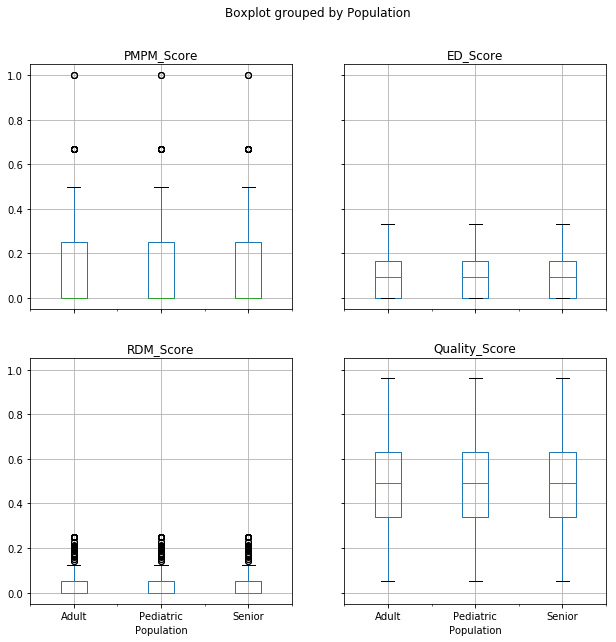

In [0]:
fig = plt.figure()
ax = data.boxplot(column=['PMPM_Score', 'ED_Score', 'RDM_Score', 'Quality_Score'], by='Population', figsize=(10,10))

Now lumpsum aggs...

In [0]:
data = data.drop_duplicates()
data.head()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f34272a5588>],
      dtype=object)

<Figure size 432x288 with 0 Axes>

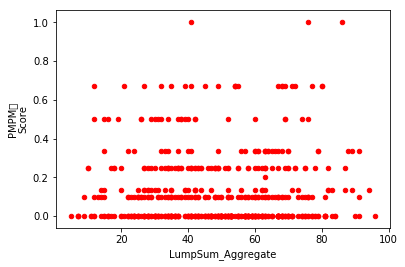

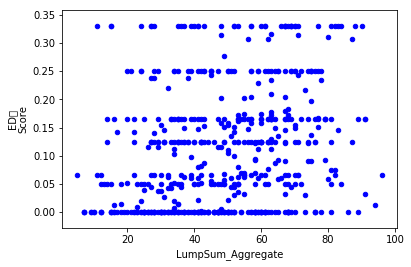

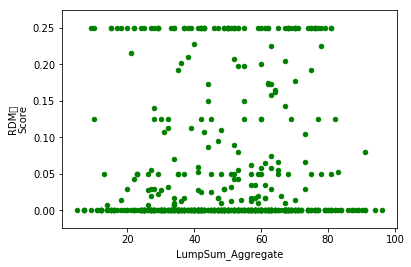

In [0]:
plt.figure()
ax = data.plot.scatter(x='LumpSum_Aggregate', y='PMPM_Score', c='Red', subplots=True)
data.plot.scatter(x='LumpSum_Aggregate', y='ED_Score', c='Blue', subplots=True)
data.plot.scatter(x='LumpSum_Aggregate', y='RDM_Score', c='Green', subplots=True)

# Aggregate scores per population
Nothing clearly emerges above... So let's break it down by population.

In [0]:
pop_data = aggs_with_reim[['EntityID', 'Population', 'Score', 'PMPM_Score', 'ED_Score', 'RDM_Score']]
pop_data.head()

,EntityID,Population,Score,PMPM Score,ED Score,RDM Score
0,Provider 2,Adult,63,0.1,0.1450,0.01
1,Provider 2,Pediatric,43,0.1,0.1450,0.01
2,Provider 2,Senior,85,0.1,0.1450,0.01
3,Provider 3,Adult,36,0.1,0.0675,0.03
4,Provider 3,Pediatric,28,0.1,0.0675,0.03


Let's start with adults.

In [0]:
adults = pop_data[pop_data['Population']=='Adult']
adults.head()

,EntityID,Population,Score,PMPM Score,ED Score,RDM Score
0,Provider 2,Adult,63,0.10,0.1450,0.0100
3,Provider 3,Adult,36,0.10,0.0675,0.0300
6,Provider 5,Adult,51,0.00,0.1575,0.0125
9,Provider 6,Adult,57,0.25,0.1350,0.0000
12,Provider 7,Adult,56,0.00,0.1225,0.0000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f342918fd68>],
      dtype=object)

<Figure size 432x288 with 0 Axes>

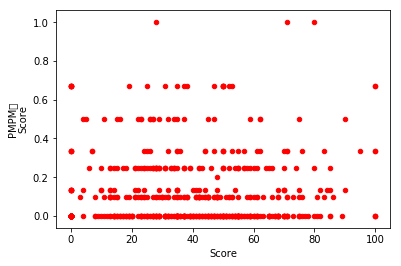

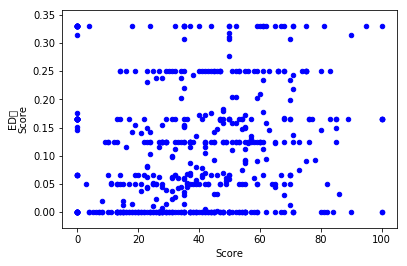

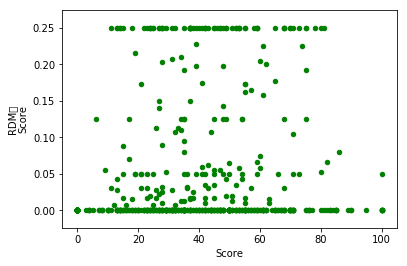

In [0]:
plt.figure()
ax = adults.plot.scatter(x='Score', y='PMPM_Score', c='Red', subplots=True)
adults.plot.scatter(x='Score', y='ED_Score', c='Blue', subplots=True)
adults.plot.scatter(x='Score', y='RDM_Score', c='Green', subplots=True)

In [0]:
ped = pop_data[pop_data['Population']=='Pediatric']
ped.head()

,EntityID,Population,Score,PMPM Score,ED Score,RDM Score
1,Provider 2,Pediatric,43,0.10,0.1450,0.0100
4,Provider 3,Pediatric,28,0.10,0.0675,0.0300
7,Provider 5,Pediatric,100,0.00,0.1575,0.0125
10,Provider 6,Pediatric,0,0.25,0.1350,0.0000
13,Provider 7,Pediatric,22,0.00,0.1225,0.0000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3427181400>],
      dtype=object)

<Figure size 432x288 with 0 Axes>

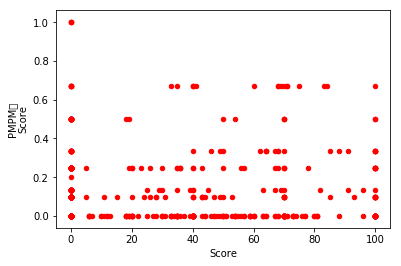

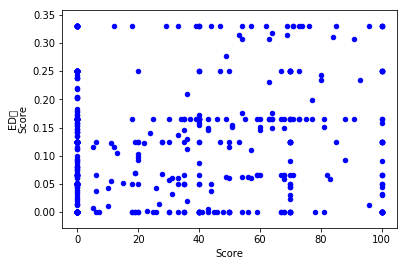

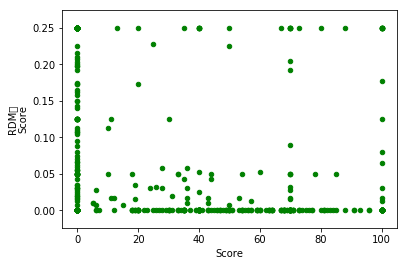

In [0]:
plt.figure()
ax = ped.plot.scatter(x='Score', y='PMPM_Score', c='Red', subplots=True)
ped.plot.scatter(x='Score', y='ED_Score', c='Blue', subplots=True)
ped.plot.scatter(x='Score', y='RDM_Score', c='Green', subplots=True)

In [0]:
sen = pop_data[pop_data['Population']=='Senior']
sen.head()

,EntityID,Population,Score,PMPM Score,ED Score,RDM Score
2,Provider 2,Senior,85,0.10,0.1450,0.0100
5,Provider 3,Senior,78,0.10,0.0675,0.0300
8,Provider 5,Senior,60,0.00,0.1575,0.0125
11,Provider 6,Senior,68,0.25,0.1350,0.0000
14,Provider 7,Senior,79,0.00,0.1225,0.0000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3426fd6da0>],
      dtype=object)

<Figure size 432x288 with 0 Axes>

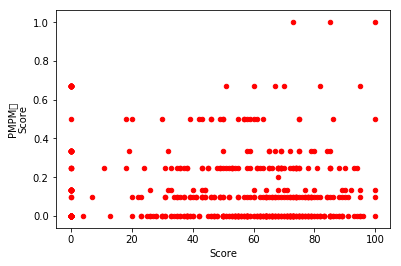

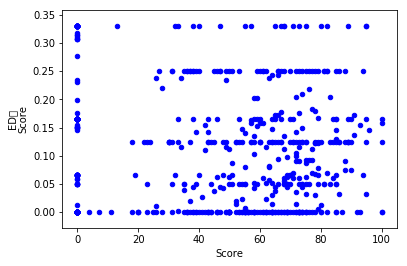

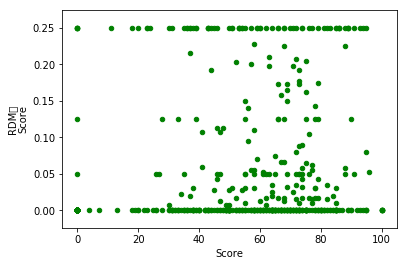

In [0]:
plt.figure()
ax = sen.plot.scatter(x='Score', y='PMPM_Score', c='Red', subplots=True)
sen.plot.scatter(x='Score', y='ED_Score', c='Blue', subplots=True)
sen.plot.scatter(x='Score', y='RDM_Score', c='Green', subplots=True)

## Aggregate reimbursements by population

In [0]:
pop_data2 = aggs_with_reim[['EntityID', 'Population', 'Reimbursement', 'PMPM_Score', 'ED_Score', 'RDM_Score']]
pop_data2.head()

,EntityID,Population,Reimbursement,PMPM Score,ED Score,RDM Score
0,Provider 2,Adult,35.0,0.1,0.1450,0.01
1,Provider 2,Pediatric,6.0,0.1,0.1450,0.01
2,Provider 2,Senior,26.0,0.1,0.1450,0.01
3,Provider 3,Adult,18.0,0.1,0.0675,0.03
4,Provider 3,Pediatric,5.0,0.1,0.0675,0.03


In [0]:
adults2 = pop_data2[pop_data2['Population']=='Adult']
ped2 = pop_data2[pop_data2['Population']=='Pediatric']
sen2 = pop_data2[pop_data2['Population']=='Senior']
sen2.head()

,EntityID,Population,Reimbursement,PMPM Score,ED Score,RDM Score
2,Provider 2,Senior,26.0,0.10,0.1450,0.0100
5,Provider 3,Senior,26.0,0.10,0.0675,0.0300
8,Provider 5,Senior,23.0,0.00,0.1575,0.0125
11,Provider 6,Senior,48.0,0.25,0.1350,0.0000
14,Provider 7,Senior,40.0,0.00,0.1225,0.0000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3426df9d30>],
      dtype=object)

<Figure size 432x288 with 0 Axes>

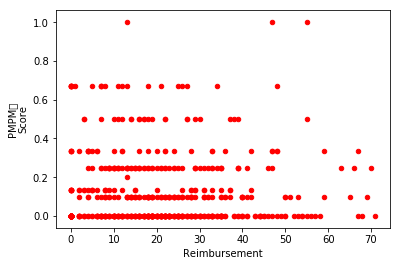

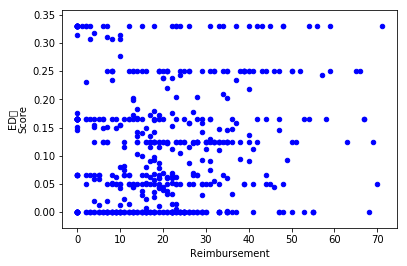

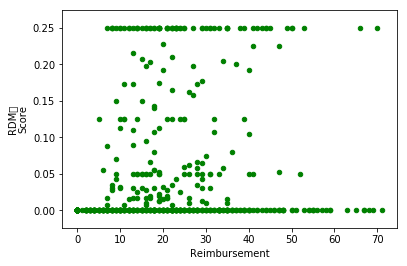

In [0]:
# Adults
plt.figure()
ax = adults2.plot.scatter(x='Reimbursement', y='PMPM_Score', c='Red', subplots=True)
adults2.plot.scatter(x='Reimbursement', y='ED_Score', c='Blue', subplots=True)
adults2.plot.scatter(x='Reimbursement', y='RDM_Score', c='Green', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3427113940>],
      dtype=object)

<Figure size 432x288 with 0 Axes>

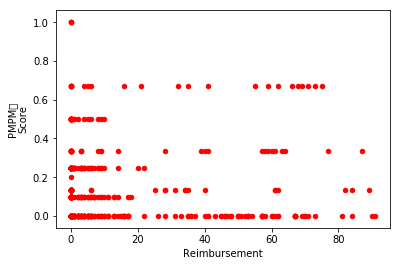

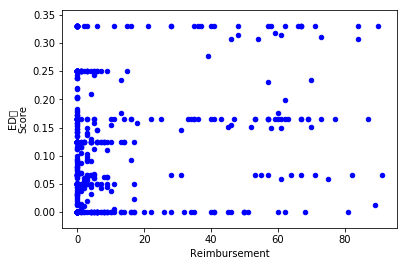

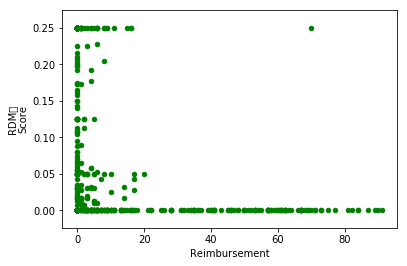

In [0]:
# Pediatric
plt.figure()
ax = ped2.plot.scatter(x='Reimbursement', y='PMPM_Score', c='Red', subplots=True)
ped2.plot.scatter(x='Reimbursement', y='ED_Score', c='Blue', subplots=True)
ped2.plot.scatter(x='Reimbursement', y='RDM_Score', c='Green', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3428050400>],
      dtype=object)

<Figure size 432x288 with 0 Axes>

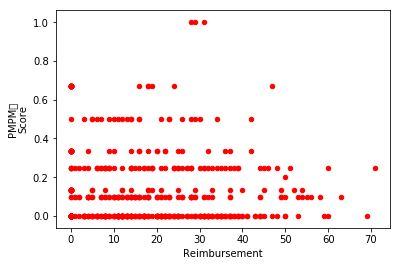

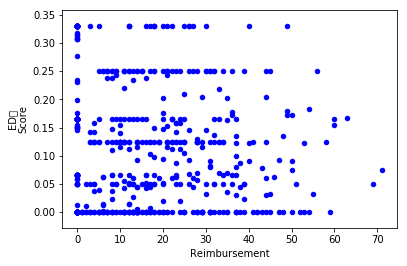

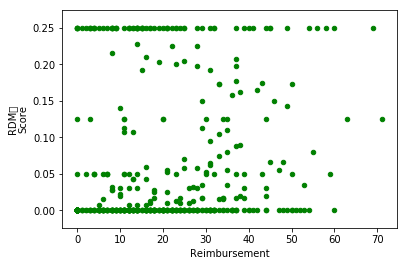

In [0]:
# Senior
plt.figure()
ax = sen2.plot.scatter(x='Reimbursement', y='PMPM_Score', c='Red', subplots=True)
sen2.plot.scatter(x='Reimbursement', y='ED_Score', c='Blue', subplots=True)
sen2.plot.scatter(x='Reimbursement', y='RDM_Score', c='Green', subplots=True)

# Metric breakdown
Nothing yet. Let's dig a little deeper!

For some at-a-glance insight, let's plot each metric against PMPM score, within that population.

In [0]:
metrics = pd.read_excel('metrics.xlsx', sheet_name=0)
metrics.head()

,EntityID,Program,Region,Population,Order,Class,ID,Name,Weight,Key_Master,Denominator,Numerator,Trend_Numerator,Gaps_Population,Predicted_Numerator,Observed,Expected,Rate,Min,Mid,Max,Metric,Points,Count,Total_Metrics,Total_Scored,Total_Points,Score,Total
0,Provider 1,TP,WPA,Adult,1,Static,QN02_3,Comprehensive Diabetes Care: Medical Attention...,1.0,QN02_3,745.0,703.0,NaN,NaN,NaN,NaN,NaN,0.94,0.90,0.92,0.97,0.7,0.7,1.0,17,11.7,11.7,69,17
1,Provider 1,TP,WPA,Adult,2,Static,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,1.0,QN02_4,745.0,498.0,NaN,NaN,NaN,NaN,NaN,0.67,0.52,0.57,0.65,1.0,1.0,1.0,17,11.7,11.7,69,17
2,Provider 1,TP,WPA,Adult,3,Static,QN08,Breast Cancer Screening,1.0,QN08,1998.0,1724.0,NaN,NaN,NaN,NaN,NaN,0.86,0.79,0.82,0.86,1.0,1.0,1.0,17,11.7,11.7,69,17
3,Provider 1,TP,WPA,Adult,4,Static,QN09,Colorectal Cancer Screening,1.0,QN09,3913.0,3186.0,NaN,NaN,NaN,NaN,NaN,0.81,0.68,0.70,0.75,1.0,1.0,1.0,17,11.7,11.7,69,17
4,Provider 1,TP,WPA,Adult,5,Static,QN10,Cervical Cancer Screening,1.0,QN10,3781.0,3081.0,NaN,NaN,NaN,NaN,NaN,0.81,0.77,0.79,0.82,0.7,0.7,1.0,17,11.7,11.7,69,17


In [0]:
metrics.columns

Index(['EntityID', 'Program', 'Region', 'Population', 'Order', 'Class', 'ID',
       'Name', 'Weight', 'Key_Master', 'Denominator', 'Numerator',
       'Trend_Numerator', 'Gaps_Population', 'Predicted_Numerator', 'Observed',
       'Expected', 'Rate', 'Min', 'Mid', 'Max', 'Metric', 'Points', 'Count',
       'Total_Metrics', 'Total_Scored', 'Total_Points', 'Score', 'Total'],
      dtype='object')

In [0]:
data = metrics.copy()
data = data[['EntityID', 'Region', 'Population', 'ID', 'Name', 'Rate', 'Score']]
data.head()

,EntityID,Region,Population,ID,Name,Rate,Score
0,Provider 1,WPA,Adult,QN02_3,Comprehensive Diabetes Care: Medical Attention...,0.94,69
1,Provider 1,WPA,Adult,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,0.67,69
2,Provider 1,WPA,Adult,QN08,Breast Cancer Screening,0.86,69
3,Provider 1,WPA,Adult,QN09,Colorectal Cancer Screening,0.81,69
4,Provider 1,WPA,Adult,QN10,Cervical Cancer Screening,0.81,69


In [0]:
reim = pd.read_csv('reimbursements.csv')
reim['Adult_QA Score'] = pd.to_numeric(reim['Adult_QA Score'], errors='coerce')
reim.head()

,EntityID,Region,Quality Score,Quality Threshold,PMPM Score,ED Score,RDM Score,CU Score,RM Score,Commercial Mems,Medicare Advantage Mems,Active Enrollment,Commercial Potential $,Medicare Advantage Potential $,Total Potential $,QA Potential $,CU Potential $,RM Potential $,QA Earned $,CU Earned $,RM Earned $,Total Earned $,% of $ Earned,QA Missed $,CU Missed $,RM Missed $,Total Missed $,Adult QA Score,Adult QA Mems,Peds QA Score,Peds QA Mems,Senior QA Score,Senior QA Mems,Composite Mems,Composite PMPM,Composite Risk,Composite Mrk PMPM,Composite Exp PMPM,Composite Performance,Total PMPM Pts,Adult Mems,Adult PMPM,Adult Risk,Adult Mrk PMPM,Adult Mrk Risk,Adult Exp PMPM,Adult Performance,Children Mems,Children PMPM,Children Risk,Children Mrk PMPM,Children Mrk Risk,Children Exp PMPM,Children Performance,Newborn Mems,Newborn PMPM,Newborn Risk,Newborn Mrk PMPM,Newborn Mrk Risk,Newborn Exp PMPM,Newborn Performance,MA Mems,MA PMPM,MA Risk,MA Mrk PMPM,MA Mrk Risk,MA Exp PMPM,MA Performance,Total ED Mems,Weighted ED,Total ED Pts,Adult ED Mems,Adult ED Rate,Adult Weighted ED,Adult ED Pts,Adult ED 80th %,Adult ED 50th %,Adult ED 30th %,Peds ED Mems,Peds ED Rate,Peds Weighted ED,Peds ED Pts,Peds ED 80th %,Peds ED 50th %,Peds ED 30th %,Senior ED Mems,Senior ED Rate,Senior Weighted ED,Senior ED Pts,Senior ED 80th %,Senior ED 50th %,Senior ED 30th %,Total RDM Mems,Weighted RDM,Total RDM Pts,Adult RDM Mems,Adult RDM Rate,Adult Weighted RDM,Adult RDM Pts,Adult RDM Max,Adult RDM Mid,Adult RDM Min,Senior RDM Mems,Senior RDM Rate,Senior Weighted RDM,Senior RDM Pts,Senior RDM Max,Senior RDM Mid,Senior RDM Min,RM Type,RM Aligned %,RM Baseline %,RM Performance,RM Pts,RM Target,WPA 90th %,Comm Adult/Ped Mems,FEP Mems,BDTC Mems
0,Provider 3,CPA,0.49,0.76,0.10,0.0675,0.0300,0.20,.,9271,803,0.85,667530,115608,783138,261046,522092,0,127913,104418,0,232331,0.30,133133,417674,0,550807,0.36,4783.33330,0.28,1697.8333,0.78,1584.50000,6307.500000,555.21,1.353398,582.74204,563.19,-0.0142,0.2,4037.833300,607.91,1.779344,629.53674,1.802636,621.40,-0.0217,1440.166700,184.43,0.500265,203.82661,0.560436,181.94,1.37E-02,26.666667,1309.31,1.145919,1806.9917,1.900312,1089.65,0.2016,802.83333,930.22,0.748398,1020.6288,0.815317,936.86,-7.10E-03,6307.5,1701.55,0.27,3889.166700,216,777.83333,0.2,136,186,225,1466.833300,140,733.41667,0.5,124,164,199,951.500000,249,190.30000,0.2,185,224,262,6367.83330,792.25,0.12,4783.33330,1.12,0,0,0,0.34,0.48,1584.50000,0.57,792.25,0.5,0.41,0.65,0.81,NaN,.,.,.,.,NaN,.,5505,1758,2008
1,Provider 5,WPA,0.57,0.85,0.00,0.1575,0.0125,0.17,0.15,588,112,0.68,42330,16176,58506,19502,24894,14110,11116,4232,2117,17465,0.30,8386,20662,11993,41041,0.51,416.00000,1,39.833333,0.6,139.83333,561.833330,686.56,1.597966,632.03536,644.53,0.0652,0.0,410.666670,633.71,1.901006,600.78790,2.020118,565.36,0.1209,38.833333,114.28,0.358189,193.59848,0.592652,117.01,-2.33E-02,0.000000,0.00,0.000000,.,1.971381,.,.,112.33333,1077.62,0.918703,1086.5838,0.894227,1116.33,-3.47E-02,523,326.91667,0.63,392.166670,242,196.08333,0.5,211,250,289,38.833333,258,0.00000,0,196,269,301,130.833330,260,130.83333,1,266,320,365,555.83333,27.966667,0.05,416.00000,0.55,0,0,0,0.34,0.48,139.83333,0.81,27.966667,0.2,0.41,0.65,0.81,Admissions,0.92,0.83,0.09,0.15,Min,1,450,34,105
2,Provider 6,WPA,0.65,0.83,0.25,0.1350,0.0000,0.39,1,281,277,0.76,20238,39924,60162,20054,33362,6746,13035,13011,6746,32792,0.55,7019,20351,0,27370,0.57,238.83333,.,0,0.68,282.75000,518.750000,642.98,1.150721,632.91498,692.82,-0.0719,0.5,236.333330,440.51,1.662479,590.81057,2.020118,486.21,-0.0940,5.166667,179.97,0.578742,175.62536,0.592652,171.5,4.94E-02,0.000000,0.00,0.000000,.,1.971381,.,.,277.25000,824.20,0.725147,1083.5206,0.894227,878.65,-6.20E-02,513.58333,279.75,0.54,233.833330,291,0.00000,0.0,211,250,289,5.166667,0,0.00000,0,196,269,301,279.750000,172,279.75000,1,266,320,365,521.58333,0,0,238.83333,1.88,0,0,0,0.34,0.48,282.75000,1.03,0,0,0.41,0.65,0.81,Admissions,1,0.86,0.14,1,Max Performance,1,242,8,32
3,Provide

In [0]:
reim.columns

Index(['EntityID', 'Region', 'Quality\r\nScore', 'Quality\r\nThreshold',
       'PMPM\r\nScore', 'ED\r\nScore', 'RDM\r\nScore', 'CU\r\nScore',
       'RM\r\nScore', 'Commercial\r\nMems',
       ...
       'RM\r\nType', 'RM\r\nAligned %', 'RM\r\nBaseline %',
       'RM\r\nPerformance', 'RM\r\nPts', 'RM\r\nTarget', 'WPA\r\n90th %',
       'Comm Adult/Ped\r\nMems', 'FEP\r\nMems', 'BDTC\r\nMems'],
      dtype='object', length=119)

In [0]:
sub_reim = reim[['EntityID', 'Region', 'PMPM_Score', 'ED_Score',
                 'RDM_Score', 'Adult_PMPM', 'Adult_QA Score']]
sub_reim.head()

,EntityID,Region,PMPM Score,ED Score,RDM Score,Adult PMPM,Adult QA Score
0,Provider 3,CPA,0.10,0.0675,0.0300,607.91,0.36
1,Provider 5,WPA,0.00,0.1575,0.0125,633.71,0.51
2,Provider 6,WPA,0.25,0.1350,0.0000,440.51,0.57
3,Provider 9,WV,0.00,0.0000,0.0000,823.01,0.27
4,Provider 10,WPA,0.00,0.2500,0.2500,671.33,0.53


In [0]:
metrics_with_reim = pd.merge(data, sub_reim)
metrics_with_reim.head()

,EntityID,Region,Population,ID,Name,Rate,Score,PMPM Score,ED Score,RDM Score,Adult PMPM,Adult QA Score
0,Provider 2,CPA,Adult,QN02_3,Comprehensive Diabetes Care: Medical Attention...,0.92,63,0.1,0.145,0.01,577.53,0.63
1,Provider 2,CPA,Adult,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,0.65,63,0.1,0.145,0.01,577.53,0.63
2,Provider 2,CPA,Adult,QN08,Breast Cancer Screening,0.81,63,0.1,0.145,0.01,577.53,0.63
3,Provider 2,CPA,Adult,QN09,Colorectal Cancer Screening,0.75,63,0.1,0.145,0.01,577.53,0.63
4,Provider 2,CPA,Adult,QN10,Cervical Cancer Screening,0.82,63,0.1,0.145,0.01,577.53,0.63


In [0]:
# start with adults
adult_metrics_with_reim = metrics_with_reim[metrics_with_reim['Population']=='Adult']

In [0]:
adult_metrics_with_reim.groupby(by='ID').get_group('QN08')

In [0]:
len(adult_metrics_with_reim.ID.unique())

27

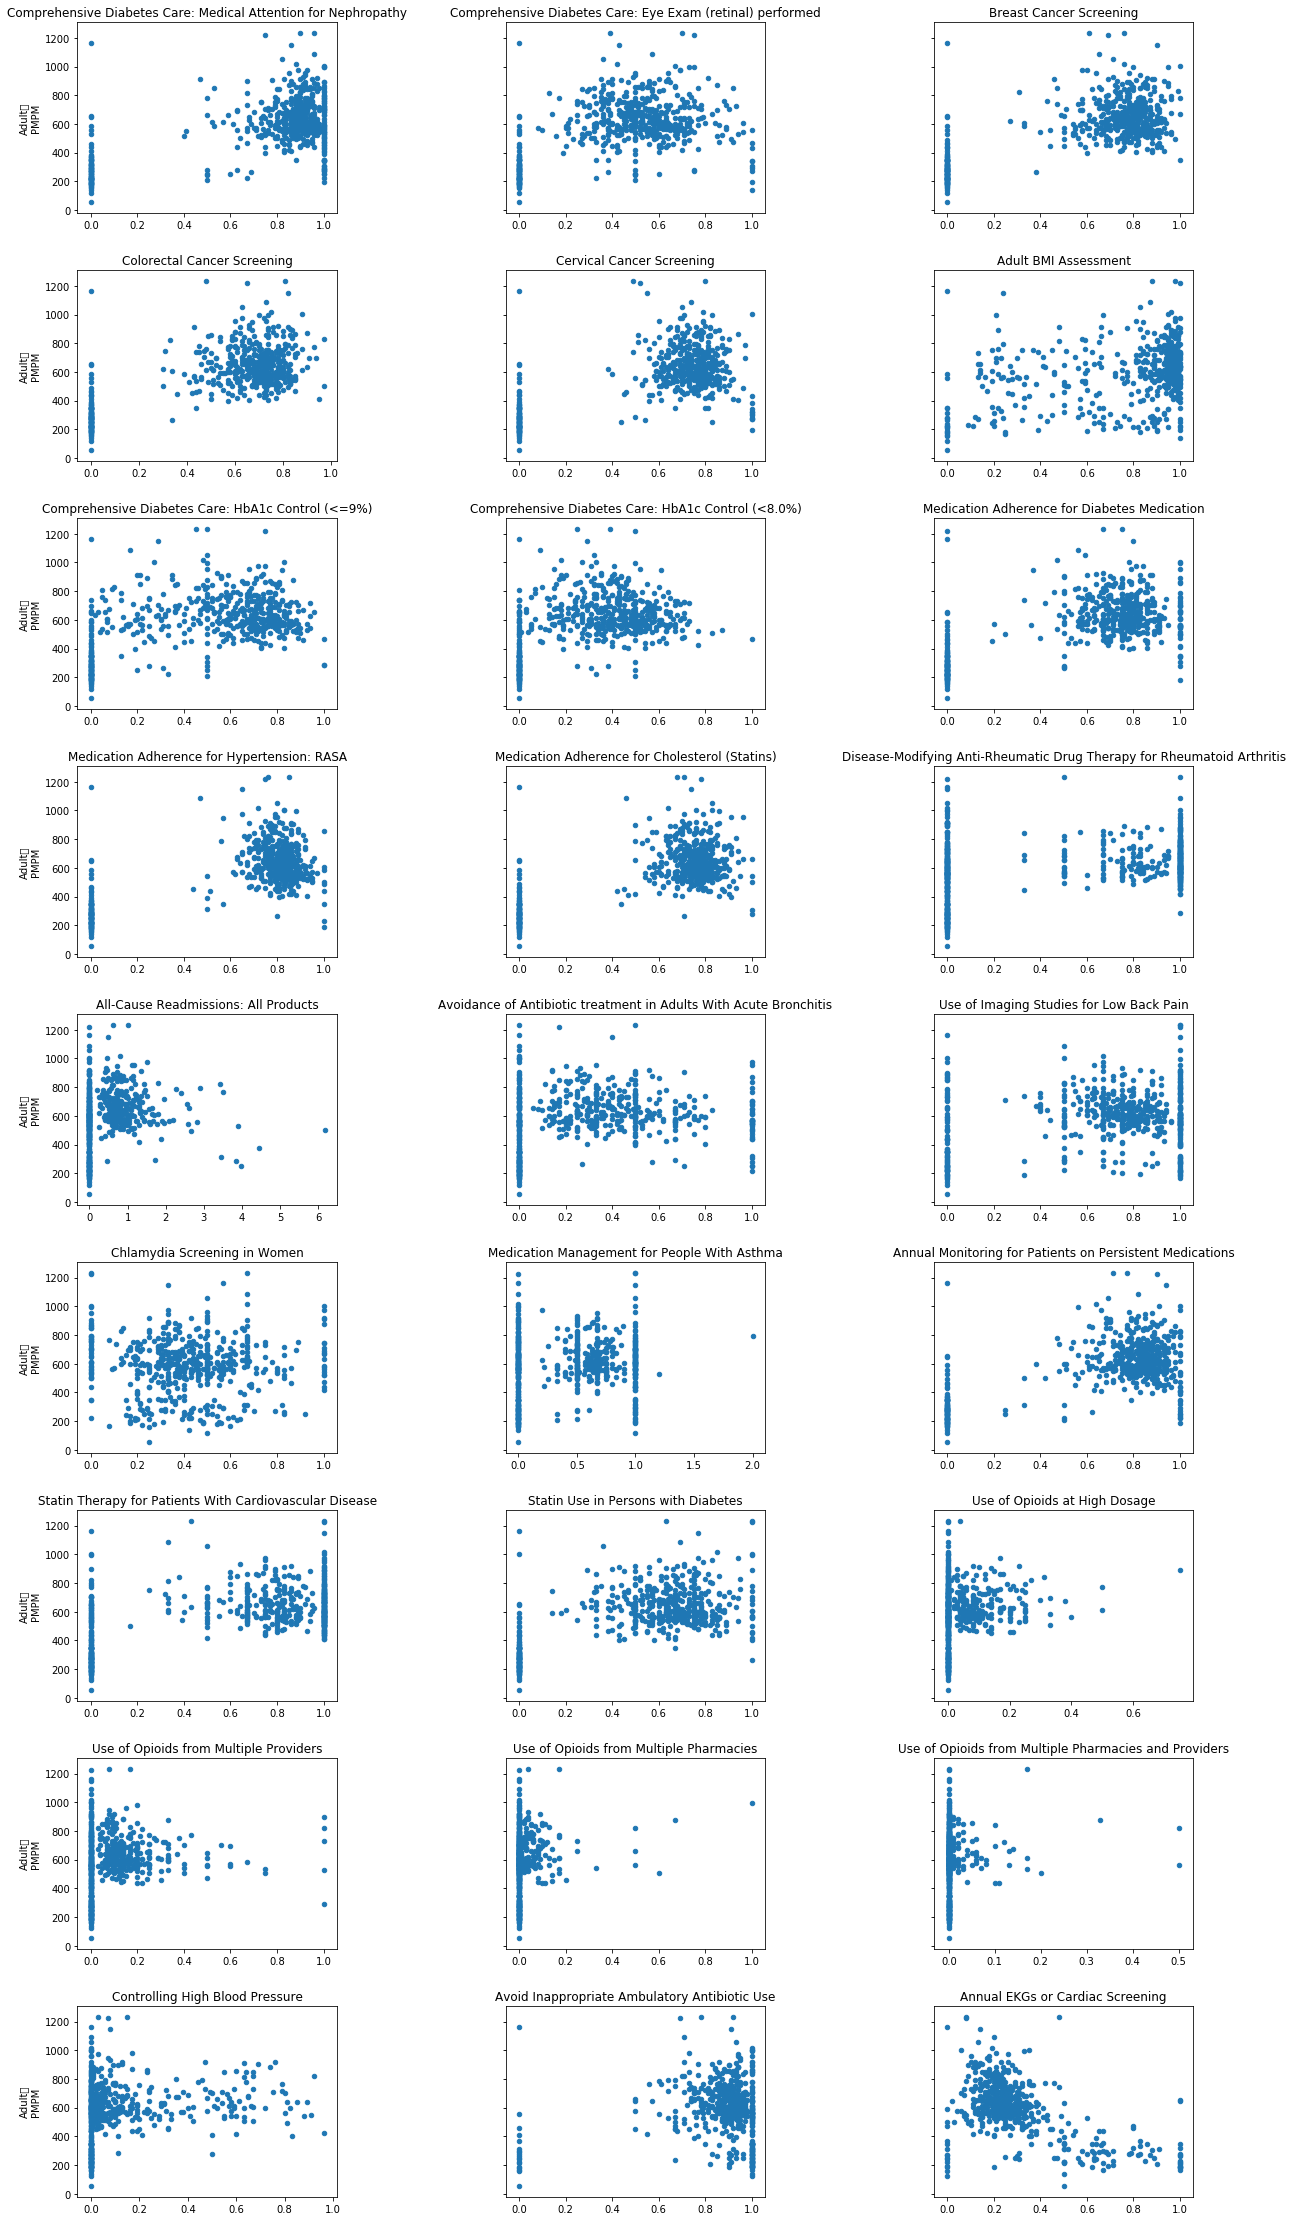

In [0]:
fig, axes = plt.subplots(9,3, sharey='row', figsize=(20,40))
grouped = adult_metrics_with_reim.groupby(by='ID')

for i, k in enumerate(grouped.groups.keys()): 
  ax = axes[i//3, i%3]
  group = grouped.get_group(k)
  group.plot(kind='scatter', x='Rate', y='Adult_PMPM', ax=ax, title=group.Name.iloc[0])
  ax.set_xlabel(None)

plt.subplots_adjust(wspace=0.65, hspace=0.3)

# fig.tight_layout()
  

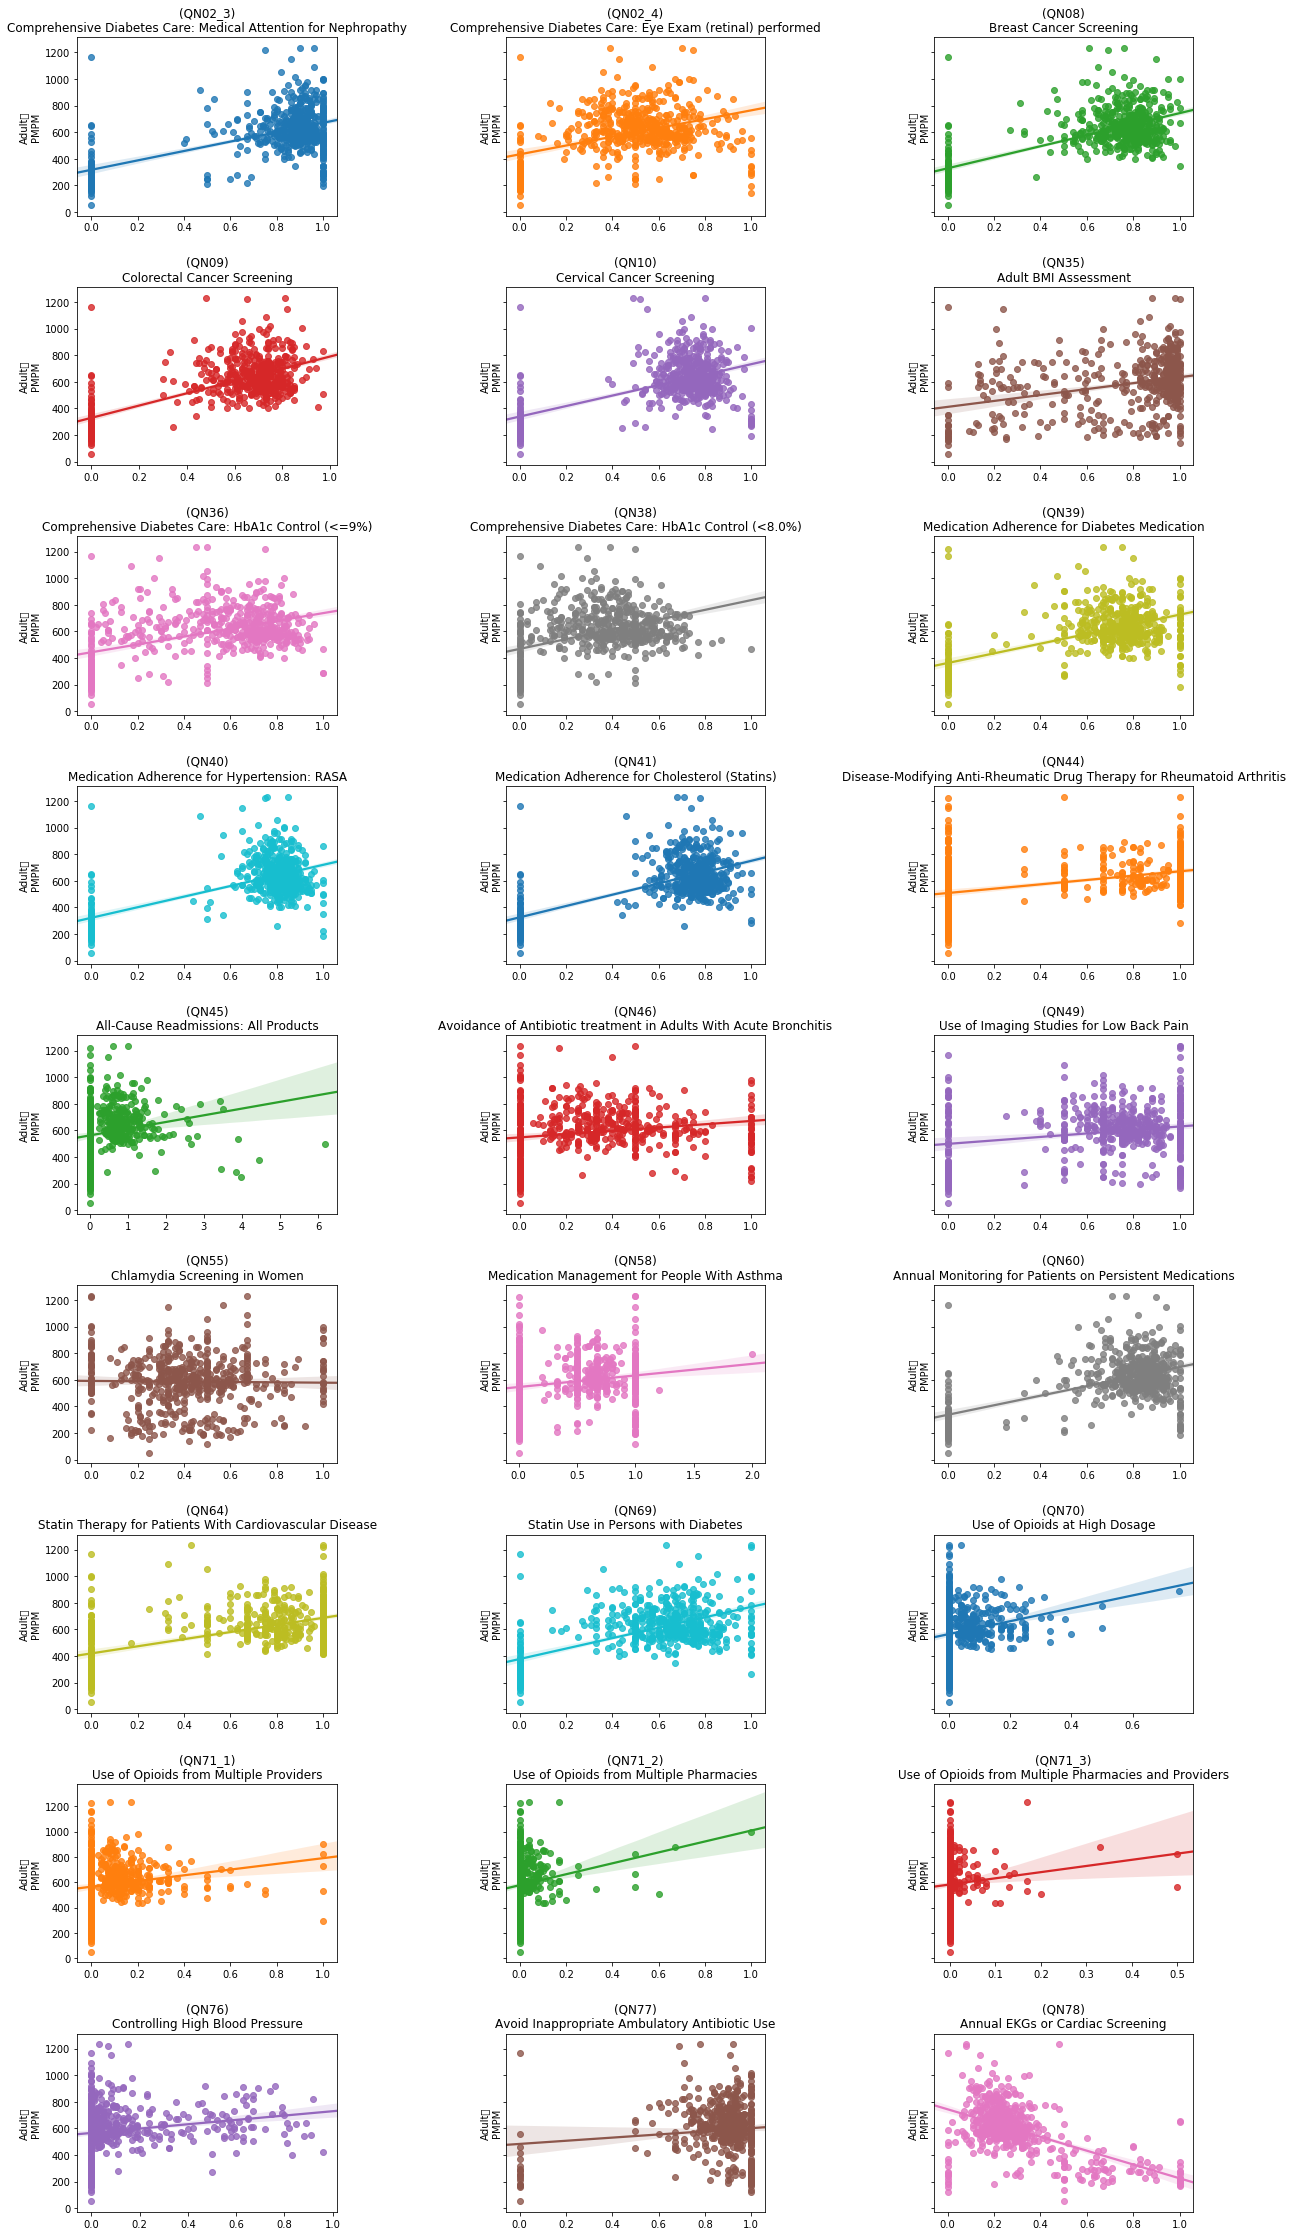

In [0]:
# can we add some trendlines?
fig, axes = plt.subplots(9,3, sharey='row', figsize=(20,40))
grouped = adult_metrics_with_reim.groupby(by='ID')

# x-axis is Rate
for i, k in enumerate(grouped.groups.keys()): 
  ax = axes[i//3, i%3]
  group = grouped.get_group(k)
  sns.regplot(x=group.Rate, y=group['Adult_PMPM'], ax=ax)
  ax.set_xlabel(None)
  ax.set_title(f'({k})\n' + group.Name.iloc[0])

plt.subplots_adjust(wspace=0.65, hspace=0.4)

# fig.tight_layout()

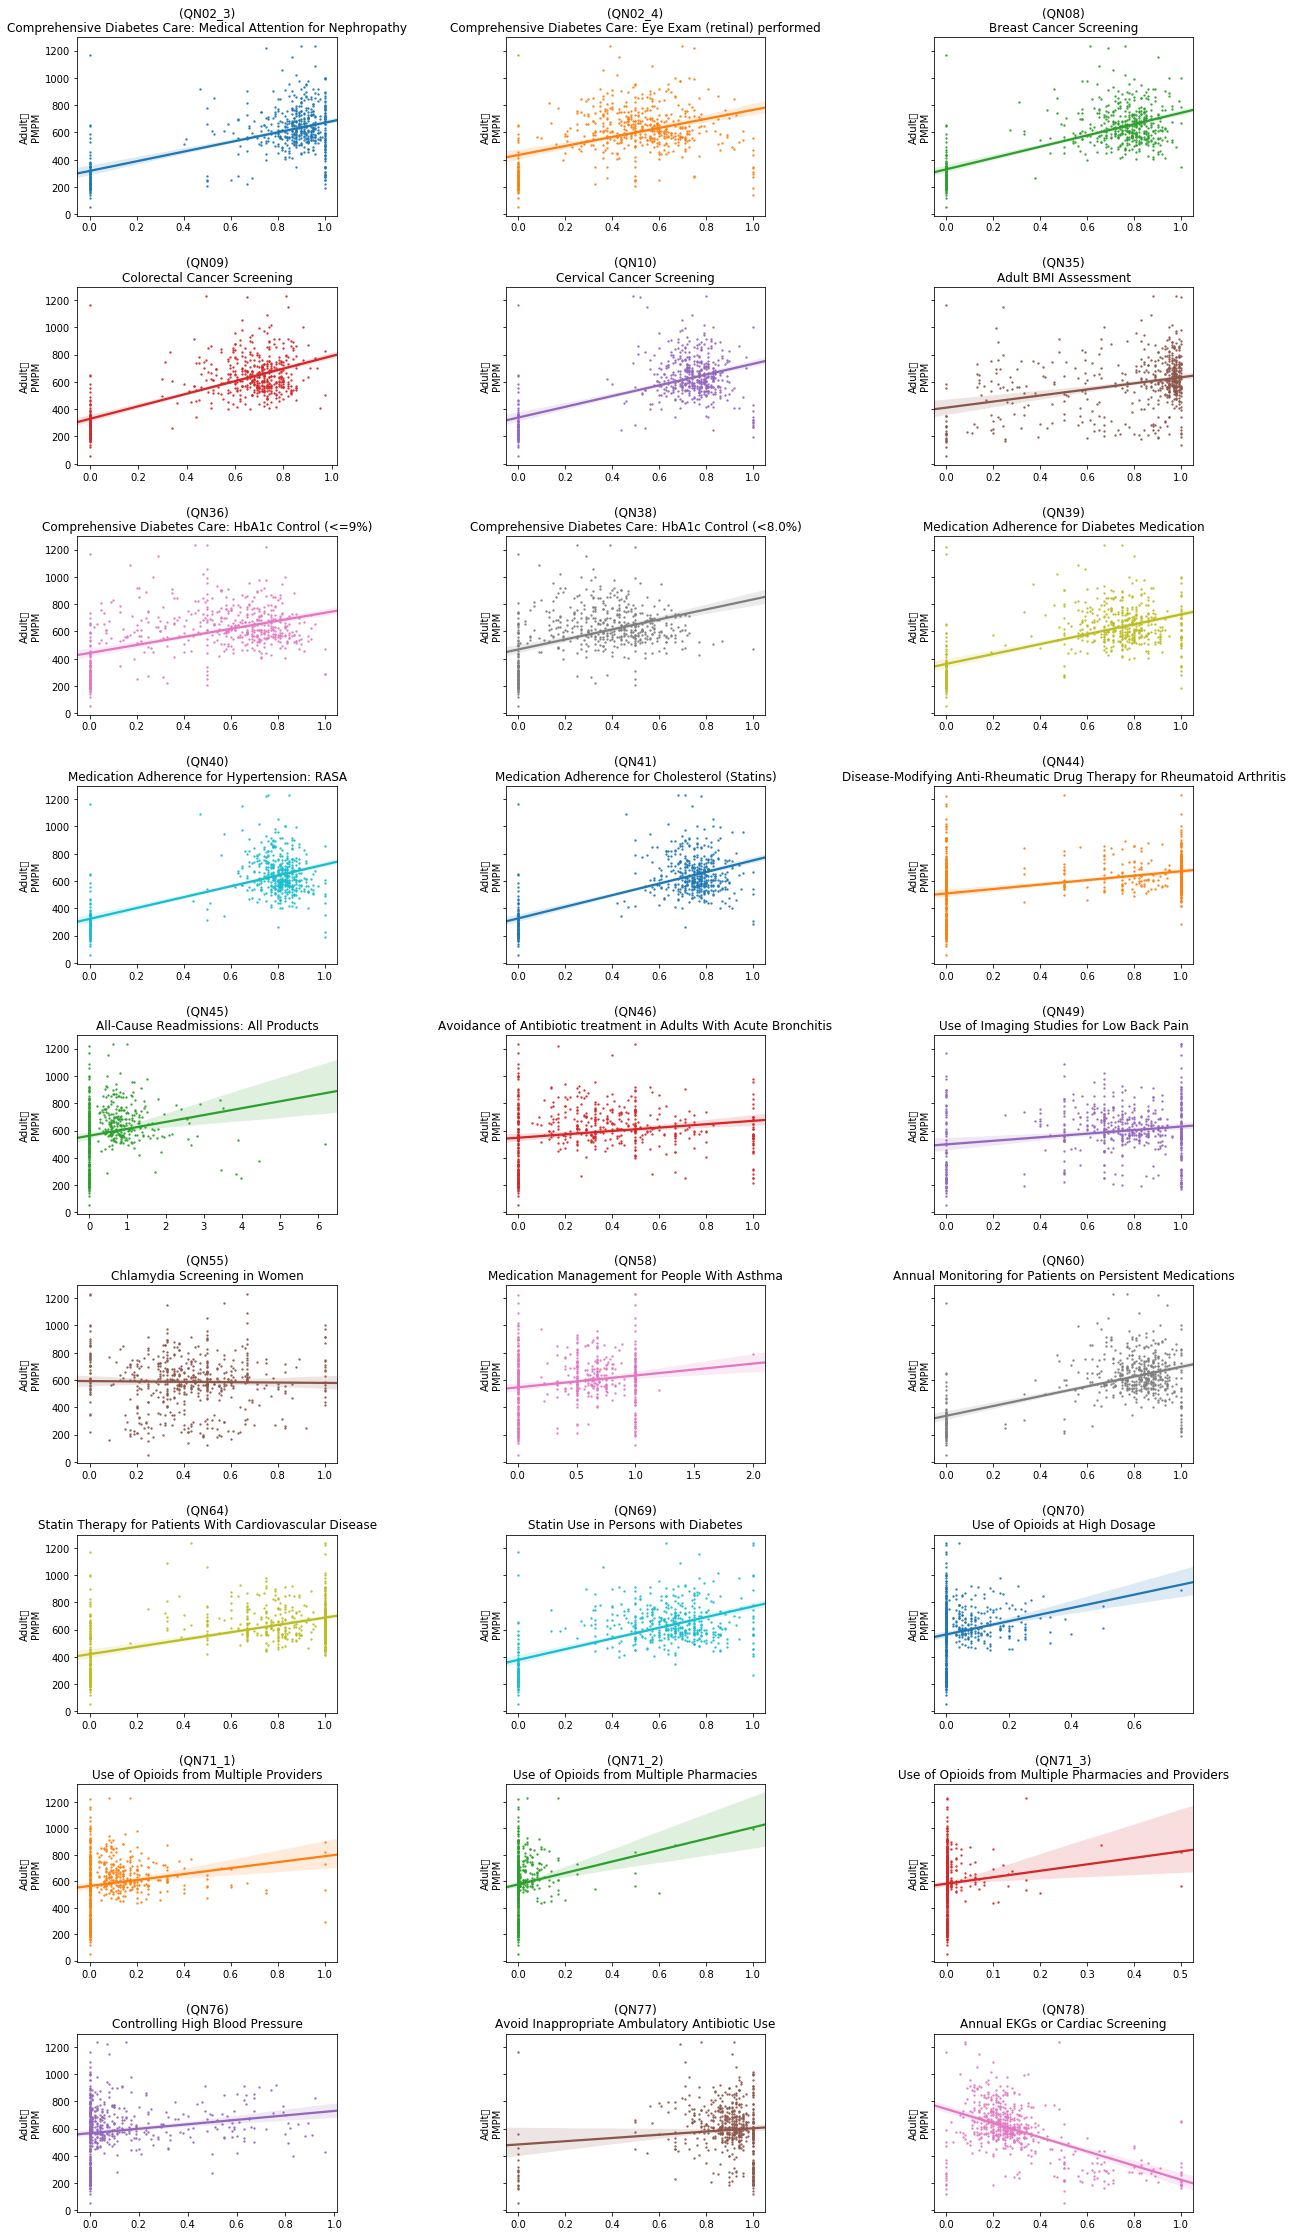

In [0]:
# can we add some trendlines?
fig, axes = plt.subplots(9,3, sharey='row', figsize=(20,40))
grouped = adult_metrics_with_reim.groupby(by='ID')

# x-axis is Rate
for i, k in enumerate(grouped.groups.keys()): 
  ax = axes[i//3, i%3]
  group = grouped.get_group(k)
  
  # let's try to exclude some useless data
  mask = (~group['Rate'].isna())

  sns.regplot(x=group.Rate[mask], y=group['Adult_PMPM'][mask], ax=ax, scatter_kws={'s':2})
  ax.set_xlabel(None)
  ax.set_title(f'({k})\n' + group.Name.iloc[0])

plt.subplots_adjust(wspace=0.65, hspace=0.4)

# fig.tight_layout()

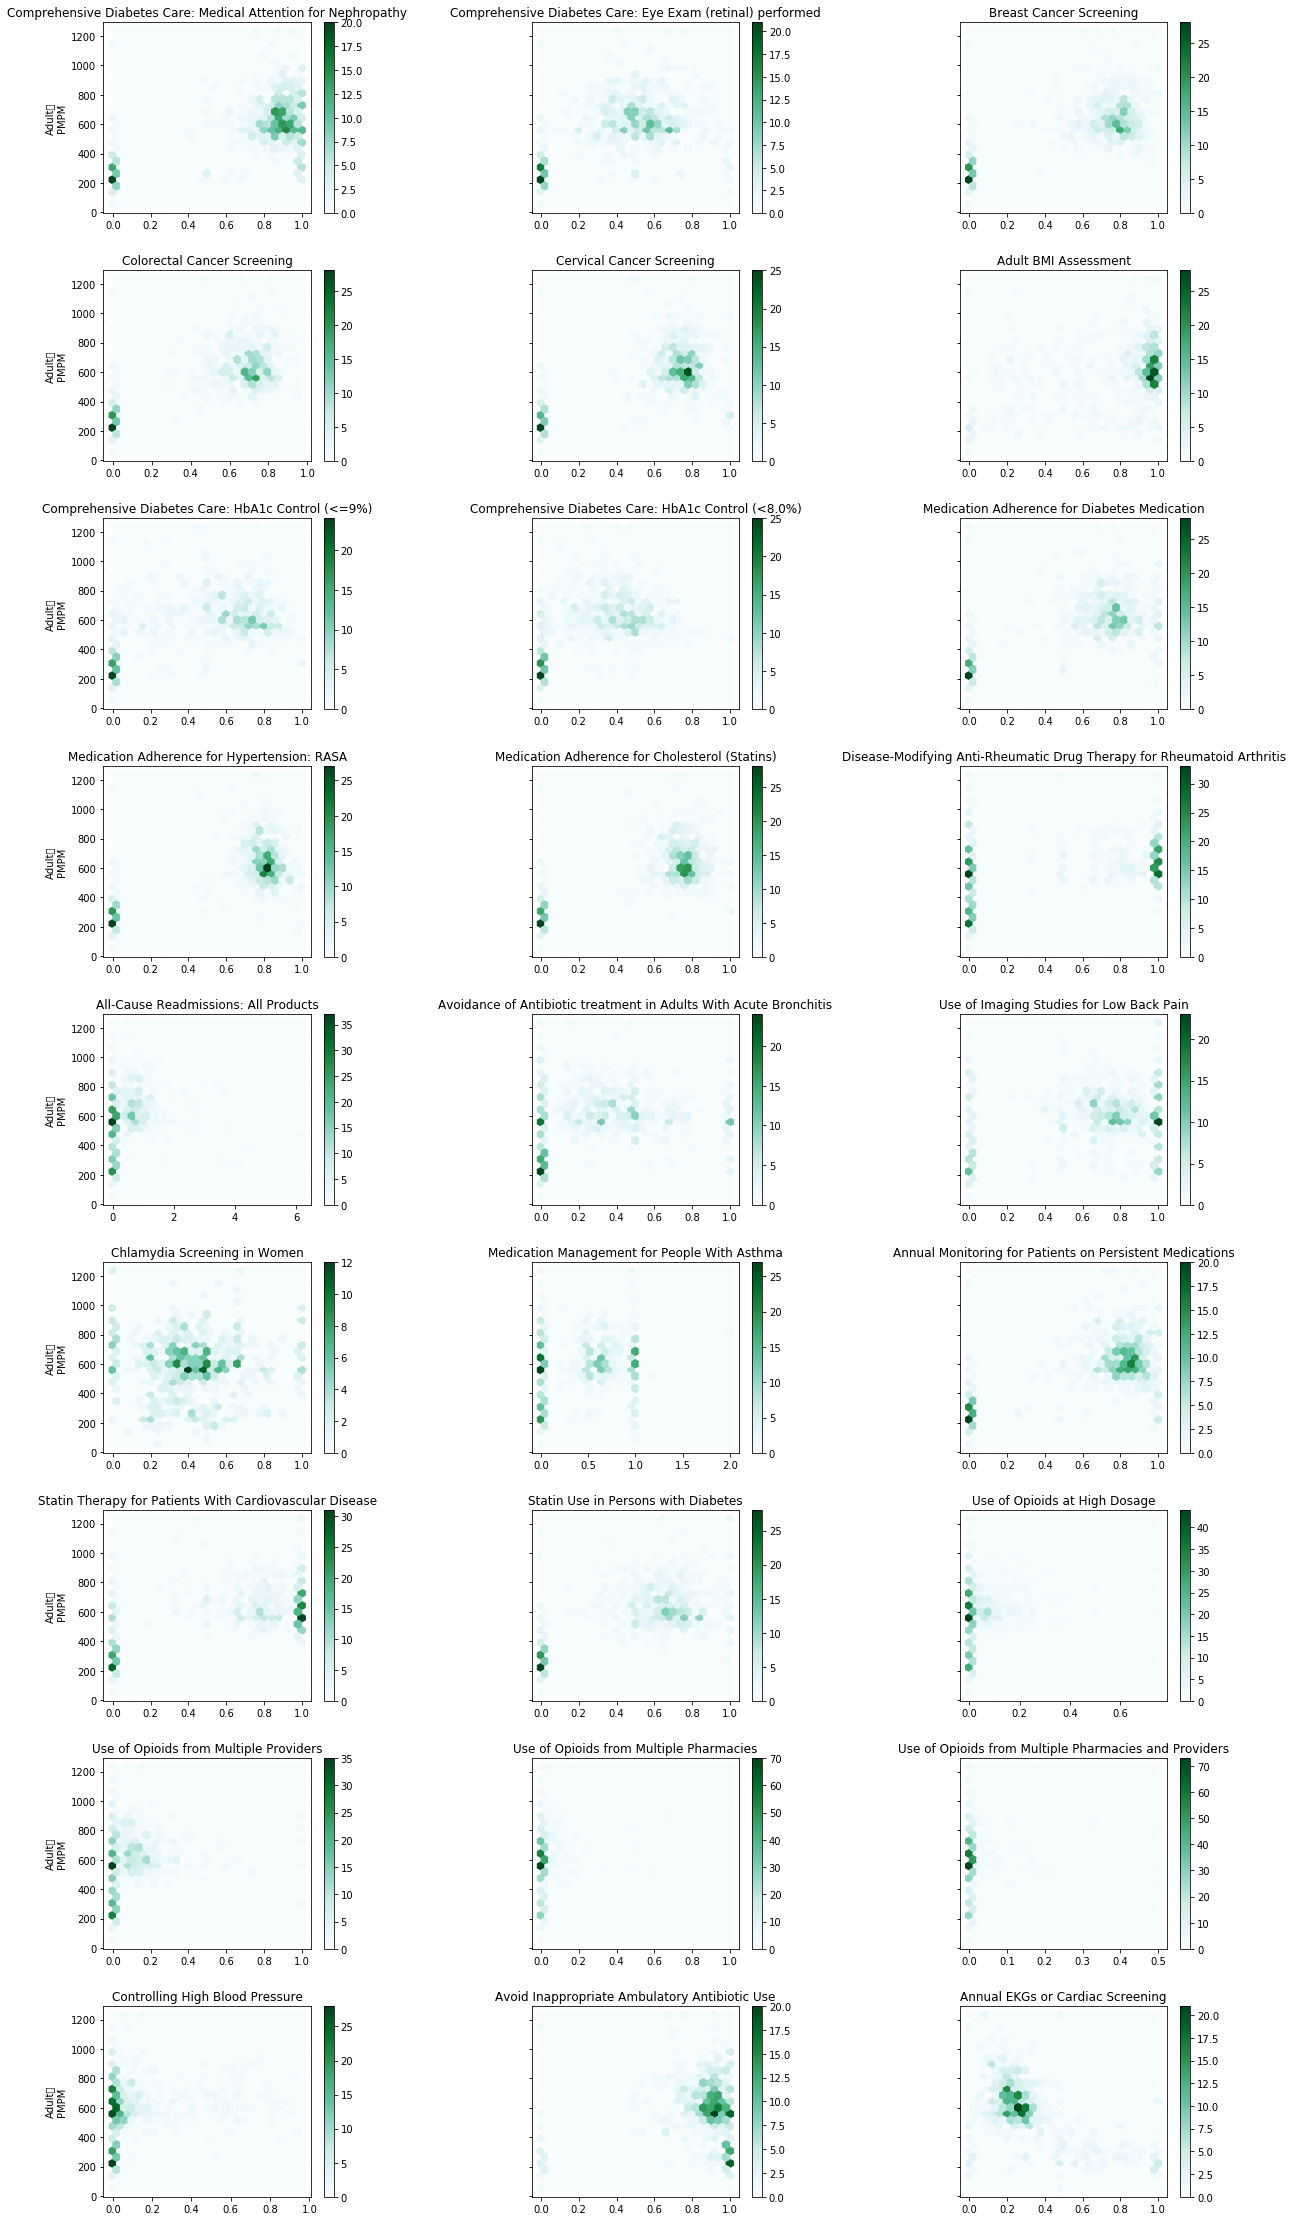

In [0]:
# try a hexbin
fig, axes = plt.subplots(9,3, sharey='row', figsize=(20,40))
grouped = adult_metrics_with_reim.groupby(by='ID')

for i, k in enumerate(grouped.groups.keys()): 
  ax = axes[i//3, i%3]
  group = grouped.get_group(k)

  # let's try to exclude some useless data
  mask = (~group['Rate'].isna())
  
  group[mask].plot.hexbin(x='Rate', y='Adult_PMPM', gridsize=25, ax=ax, title=group.Name.iloc[0])
  ax.set_xlabel(None)

plt.subplots_adjust(wspace=0.65, hspace=0.3)

# fig.tight_layout()

## Let's look at QA score instead of directly at the rate

In [0]:
sub_reim.head()

,EntityID,Region,PMPM Score,ED Score,RDM Score,Adult PMPM,Adult QA Score
0,Provider 3,CPA,0.10,0.0675,0.0300,607.91,0.36
1,Provider 5,WPA,0.00,0.1575,0.0125,633.71,0.51
2,Provider 6,WPA,0.25,0.1350,0.0000,440.51,0.57
3,Provider 9,WV,0.00,0.0000,0.0000,823.01,0.27
4,Provider 10,WPA,0.00,0.2500,0.2500,671.33,0.53


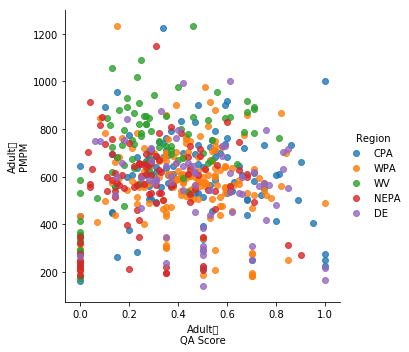

In [0]:
sns.lmplot(x='Adult_QA Score', y='Adult_PMPM', data=sub_reim, hue='Region', fit_reg=False)
# sub_reim.plot.scatter(x='Adult_QA Score', y='Adult_PMPM')

## High-level stats

In [0]:
adult_metrics_with_reim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14796 entries, 0 to 37222
Data columns (total 12 columns):
EntityID           14796 non-null object
Region             14796 non-null object
Population         14796 non-null object
ID                 14796 non-null object
Name               14796 non-null object
Rate               14796 non-null float64
Score              14796 non-null int64
PMPM
Score        14796 non-null float64
ED
Score          14796 non-null float64
RDM
Score         14796 non-null float64
Adult
PMPM        14796 non-null float64
Adult
QA Score    14337 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


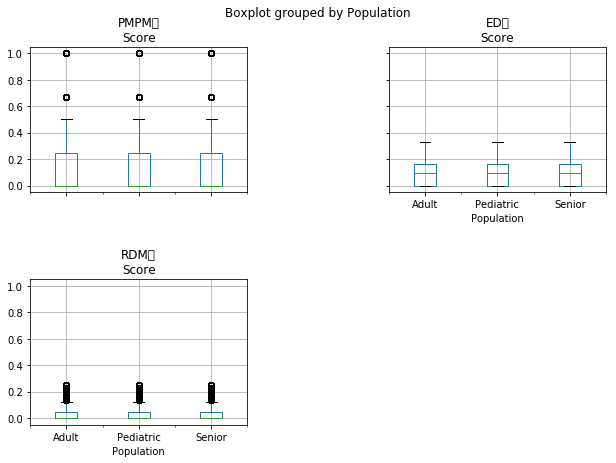

In [0]:
ax = metrics_with_reim.boxplot(column=['PMPM_Score', 'ED_Score', 'RDM_Score'], by='Population', figsize=(10,7))
plt.subplots_adjust(wspace=0.65, hspace=0.6)

In [0]:
# better boxplots


# Final EDA

### Prep

In [3]:
reim = pd.read_csv('reimbursements.csv', na_values='.')
reim.head()

,EntityID,Region,Quality\r\nScore,Quality\r\nThreshold,PMPM\r\nScore,ED\r\nScore,RDM\r\nScore,CU\r\nScore,RM\r\nScore,Commercial\r\nMems,Medicare\r\nAdvantage\r\nMems,Active\r\nEnrollment,Commercial\r\nPotential $,Medicare\r\nAdvantage\r\nPotential $,Total\r\nPotential $,QA\r\nPotential $,CU\r\nPotential $,RM\r\nPotential $,QA\r\nEarned $,CU\r\nEarned $,RM\r\nEarned $,Total\r\nEarned $,% of\r\n$ Earned,QA\r\nMissed $,CU\r\nMissed $,RM\r\nMissed $,Total\r\nMissed $,Adult\r\nQA Score,Adult\r\nQA Mems,Peds\r\nQA Score,Peds\r\nQA Mems,Senior\r\nQA Score,Senior\r\nQA Mems,Composite\r\nMems,Composite\r\nPMPM,Composite\r\nRisk,Composite\r\nMrk PMPM,Composite\r\nExp PMPM,Composite\r\nPerformance,Total\r\nPMPM Pts,Adult\r\nMems,Adult\r\nPMPM,Adult\r\nRisk,Adult\r\nMrk PMPM,Adult\r\nMrk Risk,Adult\r\nExp PMPM,Adult\r\nPerformance,Children\r\nMems,Children\r\nPMPM,Children\r\nRisk,Children\r\nMrk PMPM,Children\r\nMrk Risk,Children\r\nExp PMPM,Children\r\nPerformance,Newborn\r\nMems,Newborn\r\nPMPM,Newborn\r\nRisk,Newborn\r\nMrk PMPM,Newborn\r\nMrk Risk,Newborn\r\nExp PMPM,Newborn\r\nPerformance,MA\r\nMems,MA\r\nPMPM,MA\r\nRisk,MA\r\nMrk PMPM,MA\r\nMrk Risk,MA\r\nExp PMPM,MA\r\nPerformance,Total\r\nED Mems,Weighted\r\nED,Total\r\nED Pts,Adult\r\nED Mems,Adult\r\nED Rate,Adult\r\nWeighted ED,Adult\r\nED Pts,Adult\r\nED 80th %,Adult\r\nED 50th %,Adult\r\nED 30th %,Peds\r\nED Mems,Peds\r\nED Rate,Peds\r\nWeighted ED,Peds\r\nED Pts,Peds\r\nED 80th %,Peds\r\nED 50th %,Peds\r\nED 30th %,Senior\r\nED Mems,Senior\r\nED Rate,Senior\r\nWeighted ED,Senior\r\nED Pts,Senior\r\nED 80th %,Senior\r\nED 50th %,Senior\r\nED 30th %,Total\r\nRDM Mems,Weighted\r\nRDM,Total\r\nRDM Pts,Adult\r\nRDM Mems,Adult\r\nRDM Rate,Adult\r\nWeighted RDM,Adult\r\nRDM Pts,Adult\r\nRDM Max,Adult\r\nRDM Mid,Adult\r\nRDM Min,Senior\r\nRDM Mems,Senior\r\nRDM Rate,Senior\r\nWeighted RDM,Senior\r\nRDM Pts,Senior\r\nRDM Max,Senior\r\nRDM Mid,Senior\r\nRDM Min,RM\r\nType,RM\r\nAligned %,RM\r\nBaseline %,RM\r\nPerformance,RM\r\nPts,RM\r\nTarget,WPA\r\n90th %,Comm Adult/Ped\r\nMems,FEP\r\nMems,BDTC\r\nMems
0,Provider 3,CPA,0.49,0.76,0.10,0.0675,0.0300,0.20,NaN,9271,803,0.85,667530,115608,783138,261046,522092,0,127913,104418,0,232331,0.30,133133,417674,0,550807,0.36,4783.33330,0.28,1697.833300,0.78,1584.50000,6307.500000,555.21,1.353398,582.74204,563.19,-0.0142,0.2,4037.833300,607.91,1.779344,629.53674,1.802636,621.40,-0.0217,1440.166700,184.43,0.500265,203.82661,0.560436,181.94,0.0137,26.666667,1309.31,1.145919,1806.9917,1.900312,1089.65,0.2016,802.83333,930.22,0.748398,1020.6288,0.815317,936.86,-0.0071,6307.50000,1701.55000,0.27,3889.166700,216,777.83333,0.2,136,186,225,1466.833300,140.0,733.41667,0.5,124,164,199,951.500000,249.0,190.30000,0.2,185,224,262,6367.83330,792.250000,0.12,4783.33330,1.12,0.00000,0.0,0,0.34,0.48,1584.50000,0.57,792.250000,0.5,0.41,0.65,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5505,1758,2008
1,Provider 5,WPA,0.57,0.85,0.00,0.1575,0.0125,0.17,0.15,588,112,0.68,42330,16176,58506,19502,24894,14110,11116,4232,2117,17465,0.30,8386,20662,11993,41041,0.51,416.00000,1.00,39.833333,0.60,139.83333,561.833330,686.56,1.597966,632.03536,644.53,0.0652,0.0,410.666670,633.71,1.901006,600.78790,2.020118,565.36,0.1209,38.833333,114.28,0.358189,193.59848,0.592652,117.01,-0.0233,0.000000,0.00,0.000000,NaN,1.971381,NaN,NaN,112.33333,1077.62,0.918703,1086.5838,0.894227,1116.33,-0.0347,523.00000,326.91667,0.63,392.166670,242,196.08333,0.5,211,250,289,38.833333,258.0,0.00000,0.0,196,269,301,130.833330,260.0,130.83333,1.0,266,320,365,555.83333,27.966667,0.05,416.00000,0.55,0.00000,0.0,0,0.34,0.48,139.83333,0.81,27.966667,0.2,0.41,0.65,0.81,Admissions,0.92,0.83,0.09,0.15,Min,1.0,450,34,105
2,Provider 6,WPA,0.65,0.83,0.25,0.1350,0.0000,0.39,1.00,281,277,0.76,20238,39924,60162,20054,33362,6746,13035,13011,6746,32792,0.55,7019,20351,0,27370,0.57,238.83333,NaN,0.000000,0.68,282.75000,518.750000,642.98,1.150721,632.91498,692.82,-0.0719,0.5,236.333330,440.51,1.662479,590.81057,2.020118,486.21,-0.0

In [5]:
reim.columns = [x.replace('\r\n','_') for x in reim.columns]
reim.columns = [x.replace(' ','_') for x in reim.columns]
reim.columns

Index(['EntityID', 'Region', 'Quality_Score', 'Quality_Threshold',
       'PMPM_Score', 'ED_Score', 'RDM_Score', 'CU_Score', 'RM_Score',
       'Commercial_Mems',
       ...
       'RM_Type', 'RM_Aligned_%', 'RM_Baseline_%', 'RM_Performance', 'RM_Pts',
       'RM_Target', 'WPA_90th_%', 'Comm_Adult/Ped_Mems', 'FEP_Mems',
       'BDTC_Mems'],
      dtype='object', length=119)

In [7]:
# get the interesting columns
reim = reim[['EntityID',
             'Region',
             'Quality_Score',
             'Quality_Threshold',
             'PMPM_Score',
             'ED_Score',
             'RDM_Score',
             'Total_Potential_$',
             'QA_Potential_$',
             'QA_Earned_$',
             'QA_Missed_$',
             'Adult_QA_Score',
             'Peds_QA_Score',
             'Senior_QA_Score'
             ]]
reim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 14 columns):
EntityID             548 non-null object
Region               548 non-null object
Quality_Score        548 non-null float64
Quality_Threshold    548 non-null float64
PMPM_Score           548 non-null float64
ED_Score             548 non-null float64
RDM_Score            548 non-null float64
Total_Potential_$    548 non-null int64
QA_Potential_$       548 non-null int64
QA_Earned_$          548 non-null int64
QA_Missed_$          548 non-null int64
Adult_QA_Score       531 non-null float64
Peds_QA_Score        427 non-null float64
Senior_QA_Score      430 non-null float64
dtypes: float64(8), int64(4), object(2)
memory usage: 60.1+ KB


In [8]:
reim.EntityID.count()

548

In [9]:
reim.describe()

,Quality_Score,Quality_Threshold,PMPM_Score,ED_Score,RDM_Score,Total_Potential_$,QA_Potential_$,QA_Earned_$,QA_Missed_$,Adult_QA_Score,Peds_QA_Score,Senior_QA_Score
count,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,531.000000,427.000000,430.000000
mean,0.486223,0.660274,0.128985,0.111799,0.050432,2.025871e+05,6.752903e+04,3.346644e+04,3.406258e+04,0.398625,0.370492,0.593558
std,0.190971,0.190748,0.186526,0.104347,0.088515,7.761966e+05,2.587322e+05,1.402073e+05,1.219964e+05,0.225724,0.345236,0.214186
min,0.050000,0.070000,0.000000,0.000000,0.000000,5.778000e+03,1.926000e+03,0.000000e+00,6.160000e+02,0.000000,0.000000,0.000000
25%,0.340000,0.540000,0.000000,0.000000,0.000000,3.112800e+04,1.037600e+04,3.934250e+03,5.246000e+03,0.240000,0.000000,0.462500
50%,0.490000,0.680000,0.000000,0.096250,0.000000,5.180700e+04,1.726900e+04,7.821000e+03,9.005500e+03,0.390000,0.350000,0.630000
75%,0.630000,0.800000,0.250000,0.165000,0.050000,1.172085e+05,3.906950e+04,1.859375e+04,1.809200e+04,0.550000,0.680000,0.740000
max,0.960000,1.000000,1.000000,0.330000,0.250000,1.504063e+07,5.013544e+06,2.707314e+06,2.306230e+06,1.000000,1.000000,1.000000


In [0]:
# get a good fontsize
font = {'family' : 'normal',
        'size'   : 18}

### Quality Score vs. Outcomes

[Text(0, 0, 'Quality_Score'),
 Text(0, 0, 'PMPM_Score'),
 Text(0, 0, 'ED_Score'),
 Text(0, 0, 'RDM_Score')]

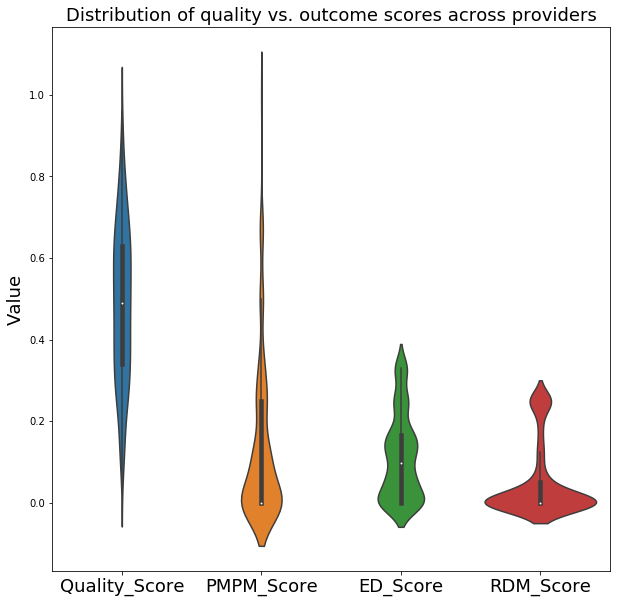

In [0]:
fig = plt.figure(figsize=(10,10))
ax = sns.violinplot(data=reim[[ 'Quality_Score', 'PMPM_Score', 'ED_Score', 'RDM_Score']])
ax.set_ylabel('Value', fontdict=font)
ax.set_title('Distribution of quality vs. outcome scores across providers', fontdict=font)
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font)

[Text(0, 0, 'Quality_Score'),
 Text(0, 0, 'PMPM_Score'),
 Text(0, 0, 'ED_Score'),
 Text(0, 0, 'RDM_Score')]

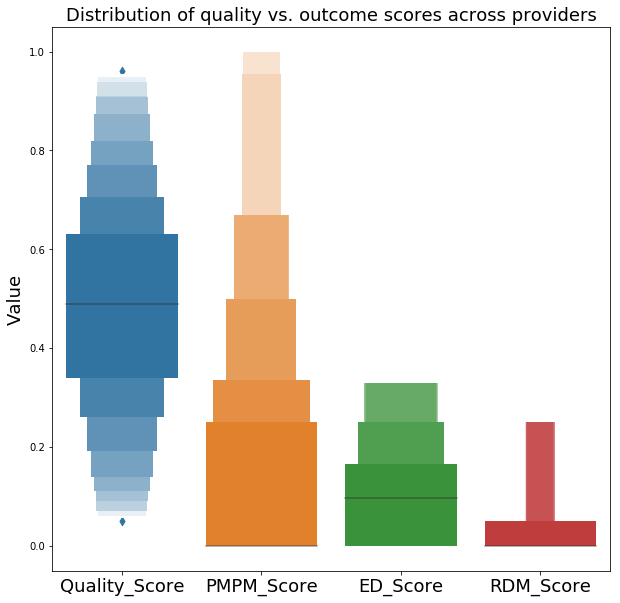

In [0]:
fig = plt.figure(figsize=(10,10))
ax = sns.boxenplot(data=reim[[ 'Quality_Score', 'PMPM_Score', 'ED_Score', 'RDM_Score']], scale='area')
ax.set_ylabel('Value', fontdict=font)
ax.set_title('Distribution of quality vs. outcome scores across providers', fontdict=font)
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font)

[Text(0, 0, 'Quality_Score'),
 Text(0, 0, 'PMPM_Score'),
 Text(0, 0, 'ED_Score'),
 Text(0, 0, 'RDM_Score')]

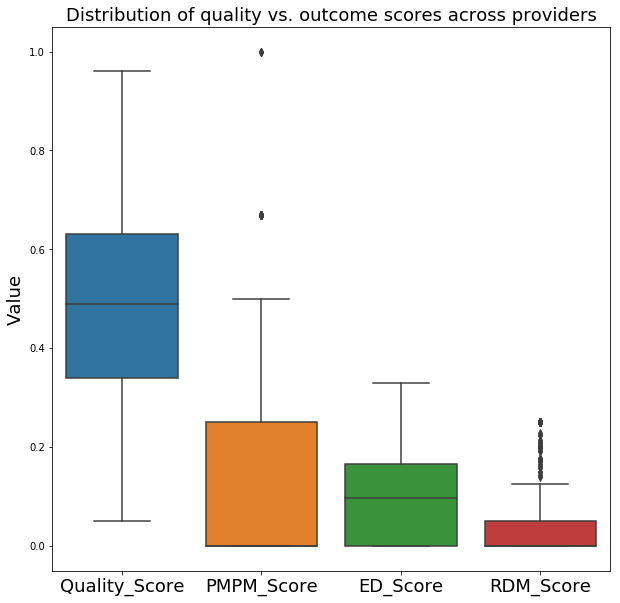

In [0]:
fig = plt.figure(figsize=(10,10))
ax = sns.boxplot(data=reim[[ 'Quality_Score', 'PMPM_Score', 'ED_Score', 'RDM_Score']],)
ax.set_ylabel('Value', fontdict=font)
ax.set_title('Distribution of quality vs. outcome scores across providers', fontdict=font)
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font)

### QA Score per region, per population?


In [12]:
reim.head()

,EntityID,Region,Quality_Score,Quality_Threshold,PMPM_Score,ED_Score,RDM_Score,Total_Potential_$,QA_Potential_$,QA_Earned_$,QA_Missed_$,Adult_QA_Score,Peds_QA_Score,Senior_QA_Score
0,Provider 3,CPA,0.49,0.76,0.10,0.0675,0.0300,783138,261046,127913,133133,0.36,0.28,0.78
1,Provider 5,WPA,0.57,0.85,0.00,0.1575,0.0125,58506,19502,11116,8386,0.51,1.00,0.60
2,Provider 6,WPA,0.65,0.83,0.25,0.1350,0.0000,60162,20054,13035,7019,0.57,NaN,0.68
3,Provider 9,WV,0.30,0.45,0.00,0.0000,0.0000,13758,4586,1376,3210,0.27,0.40,NaN
4,Provider 10,WPA,0.52,0.71,0.00,0.2500,0.2500,35682,11894,6185,5709,0.53,1.00,0.51


[Text(0, 0, 'CPA'),
 Text(0, 0, 'WPA'),
 Text(0, 0, 'WV'),
 Text(0, 0, 'NEPA'),
 Text(0, 0, 'DE')]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


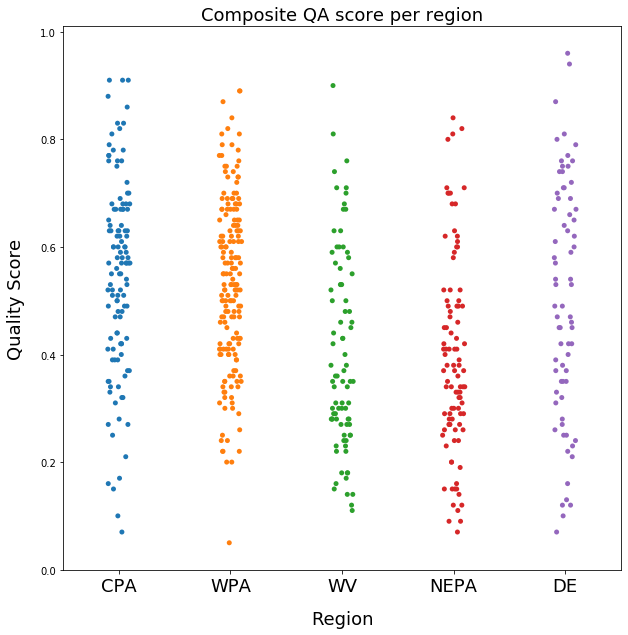

In [13]:
fig = plt.figure(figsize=(10,10))
ax = sns.stripplot(x='Region', y='Quality_Score', data=reim, jitter=True)
ax.set_xlabel('Region', labelpad=15, fontdict=font)
ax.set_ylabel('Quality Score', labelpad=15, fontdict=font)
ax.set_title('Composite QA score per region', fontdict=font)
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font)

[Text(0, 0, 'CPA'),
 Text(0, 0, 'WPA'),
 Text(0, 0, 'WV'),
 Text(0, 0, 'NEPA'),
 Text(0, 0, 'DE')]

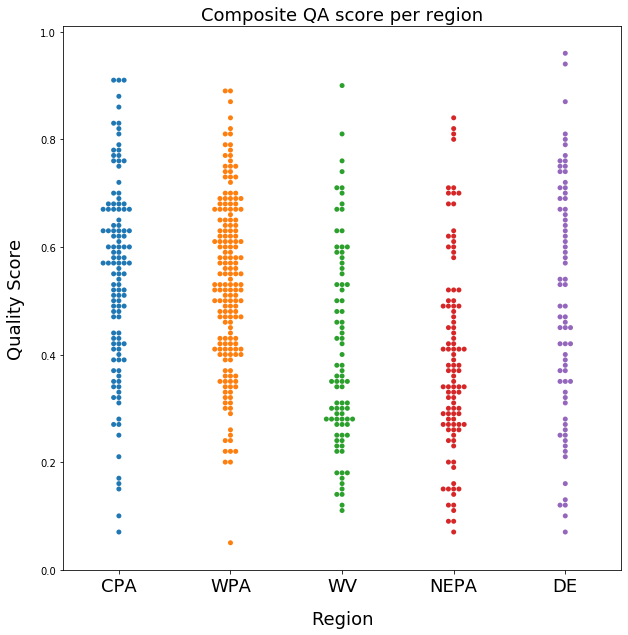

In [14]:
# alternative plot
fig = plt.figure(figsize=(10,10))
ax = sns.swarmplot(x='Region', y='Quality_Score', data=reim)
ax.set_xlabel('Region', labelpad=15, fontdict=font)
ax.set_ylabel('Quality Score', labelpad=15, fontdict=font)
ax.set_title('Composite QA score per region', fontdict=font)
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font)

[Text(0, 0, 'CPA'),
 Text(0, 0, 'WPA'),
 Text(0, 0, 'WV'),
 Text(0, 0, 'NEPA'),
 Text(0, 0, 'DE')]

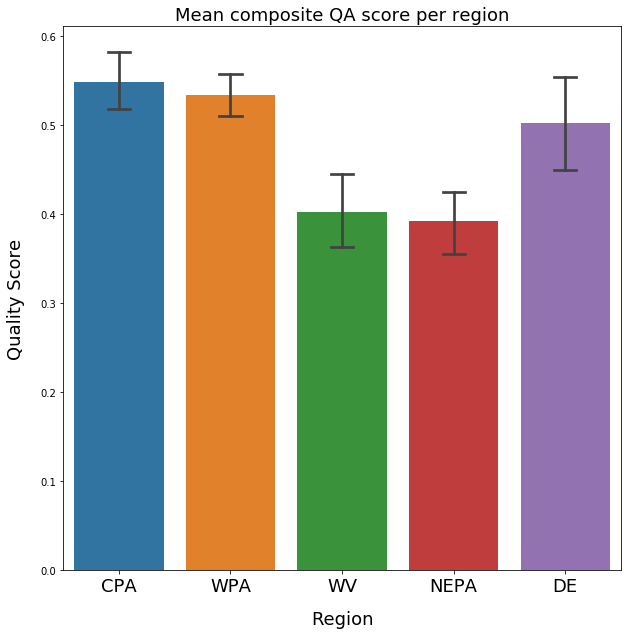

In [15]:
# alternative plot - just mean!
fig = plt.figure(figsize=(10,10))
ax = sns.barplot(x='Region', y='Quality_Score', data=reim, capsize=.2)
ax.set_xlabel('Region', labelpad=15, fontdict=font)
ax.set_ylabel('Quality Score', labelpad=15, fontdict=font)
ax.set_title('Mean composite QA score per region', fontdict=font)
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x720 with 0 Axes>

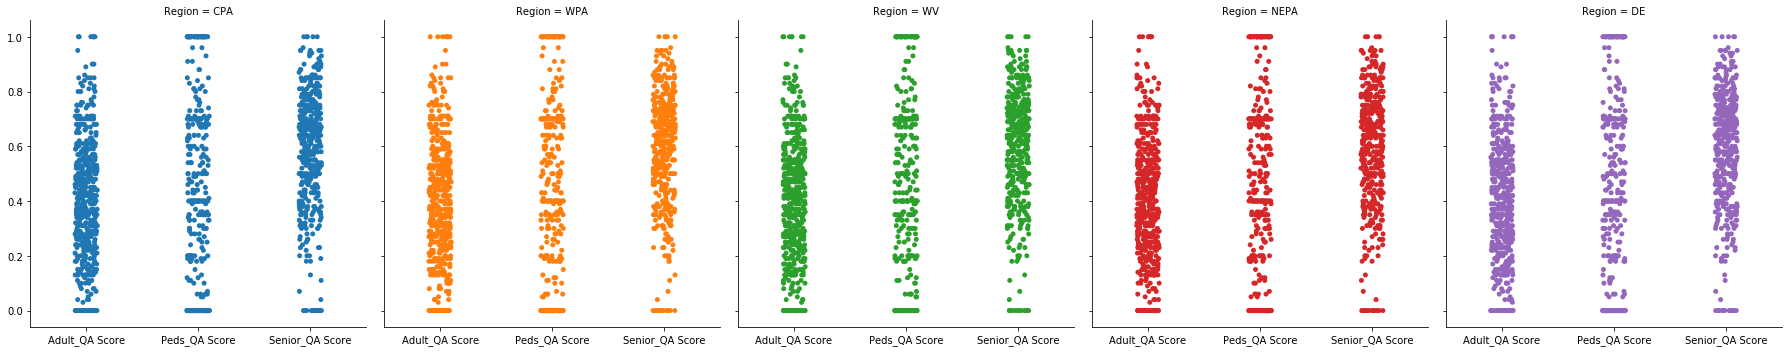

In [0]:

fig = plt.figure(figsize=(10,10))
g = sns.FacetGrid(reim, col='Region', height=5, hue='Region')
g.map(sns.stripplot, data=reim[['Region', 'Adult_QA Score', 'Peds_QA Score', 'Senior_QA Score']] )


## Outcomes per region

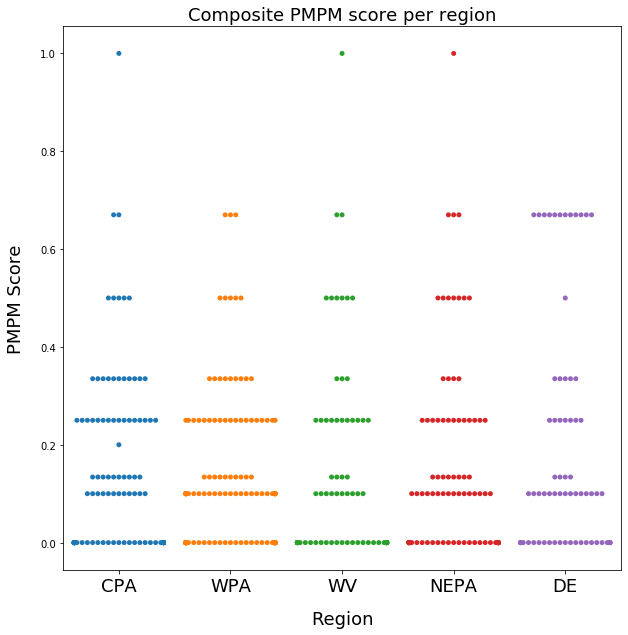

In [20]:
# alternative plot
fig = plt.figure(figsize=(10,10))
ax = sns.swarmplot(x='Region', y='PMPM_Score', data=reim)
ax.set_xlabel('Region', labelpad=15, fontdict=font)
ax.set_ylabel('PMPM Score', labelpad=15, fontdict=font)
ax.set_title('Composite PMPM score per region', fontdict=font)
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font);

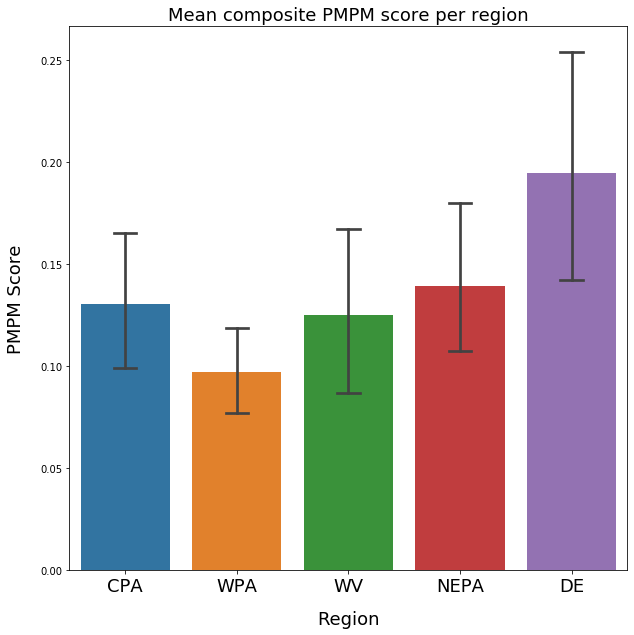

In [22]:
# alternative plot - just mean!
fig = plt.figure(figsize=(10,10))
ax = sns.barplot(x='Region', y='PMPM_Score', data=reim, capsize=.2)
ax.set_xlabel('Region', labelpad=15, fontdict=font)
ax.set_ylabel('PMPM Score', labelpad=15, fontdict=font)
ax.set_title('Mean composite PMPM score per region', fontdict=font)
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font);

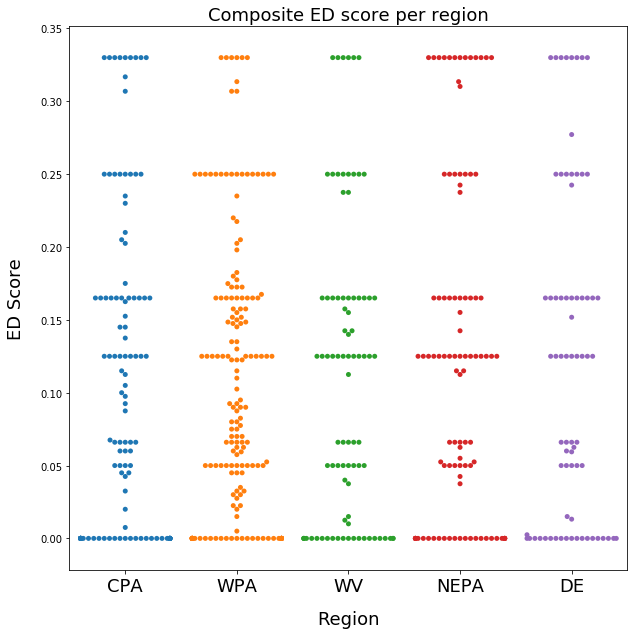

In [23]:
# alternative plot
fig = plt.figure(figsize=(10,10))
ax = sns.swarmplot(x='Region', y='ED_Score', data=reim)
ax.set_xlabel('Region', labelpad=15, fontdict=font)
ax.set_ylabel('ED Score', labelpad=15, fontdict=font)
ax.set_title('Composite ED score per region', fontdict=font)
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font);

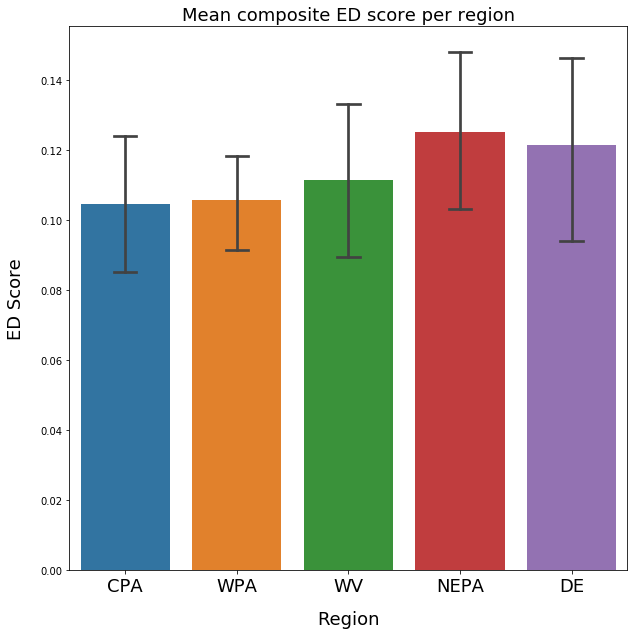

In [25]:
# alternative plot - just mean!
fig = plt.figure(figsize=(10,10))
ax = sns.barplot(x='Region', y='ED_Score', data=reim, capsize=.2)
ax.set_xlabel('Region', labelpad=15, fontdict=font)
ax.set_ylabel('ED Score', labelpad=15, fontdict=font)
ax.set_title('Mean composite ED score per region', fontdict=font)
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font);

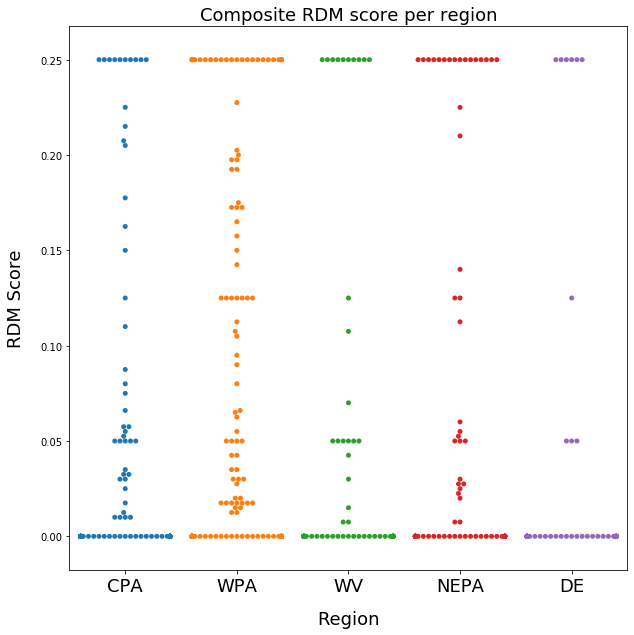

In [26]:
# alternative plot
fig = plt.figure(figsize=(10,10))
ax = sns.swarmplot(x='Region', y='RDM_Score', data=reim)
ax.set_xlabel('Region', labelpad=15, fontdict=font)
ax.set_ylabel('RDM Score', labelpad=15, fontdict=font)
ax.set_title('Composite RDM score per region', fontdict=font)
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font);

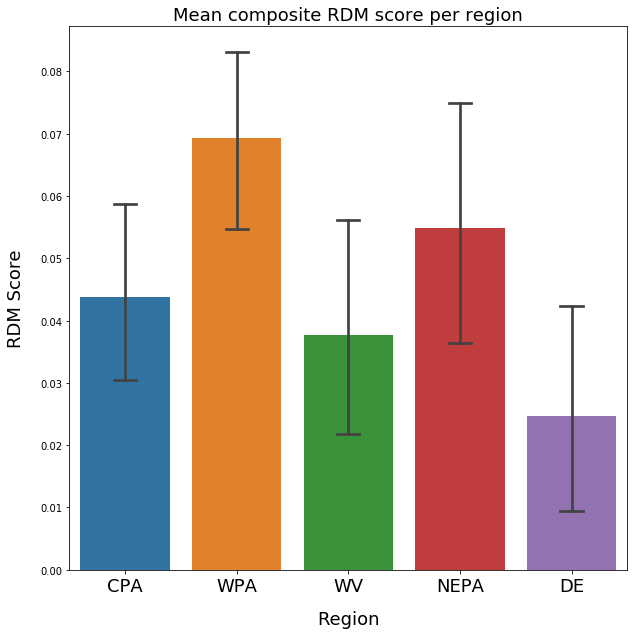

In [27]:
# alternative plot - just mean!
fig = plt.figure(figsize=(10,10))
ax = sns.barplot(x='Region', y='RDM_Score', data=reim, capsize=.2)
ax.set_xlabel('Region', labelpad=15, fontdict=font)
ax.set_ylabel('RDM Score', labelpad=15, fontdict=font)
ax.set_title('Mean composite RDM score per region', fontdict=font)
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font);

### Let's revisit those correlation charts

In [0]:
reim.head()

,EntityID,Region,Quality_Score,Quality_Threshold,PMPM_Score,ED_Score,RDM_Score,Total_Potential $,QA_Potential $,QA_Earned $,QA_Missed $,Adult_QA Score,Peds_QA Score,Senior_QA Score
0,Provider 3,CPA,0.49,0.76,0.10,0.0675,0.0300,783138,261046,127913,133133,0.36,0.28,0.78
1,Provider 5,WPA,0.57,0.85,0.00,0.1575,0.0125,58506,19502,11116,8386,0.51,1.00,0.60
2,Provider 6,WPA,0.65,0.83,0.25,0.1350,0.0000,60162,20054,13035,7019,0.57,NaN,0.68
3,Provider 9,WV,0.30,0.45,0.00,0.0000,0.0000,13758,4586,1376,3210,0.27,0.40,NaN
4,Provider 10,WPA,0.52,0.71,0.00,0.2500,0.2500,35682,11894,6185,5709,0.53,1.00,0.51


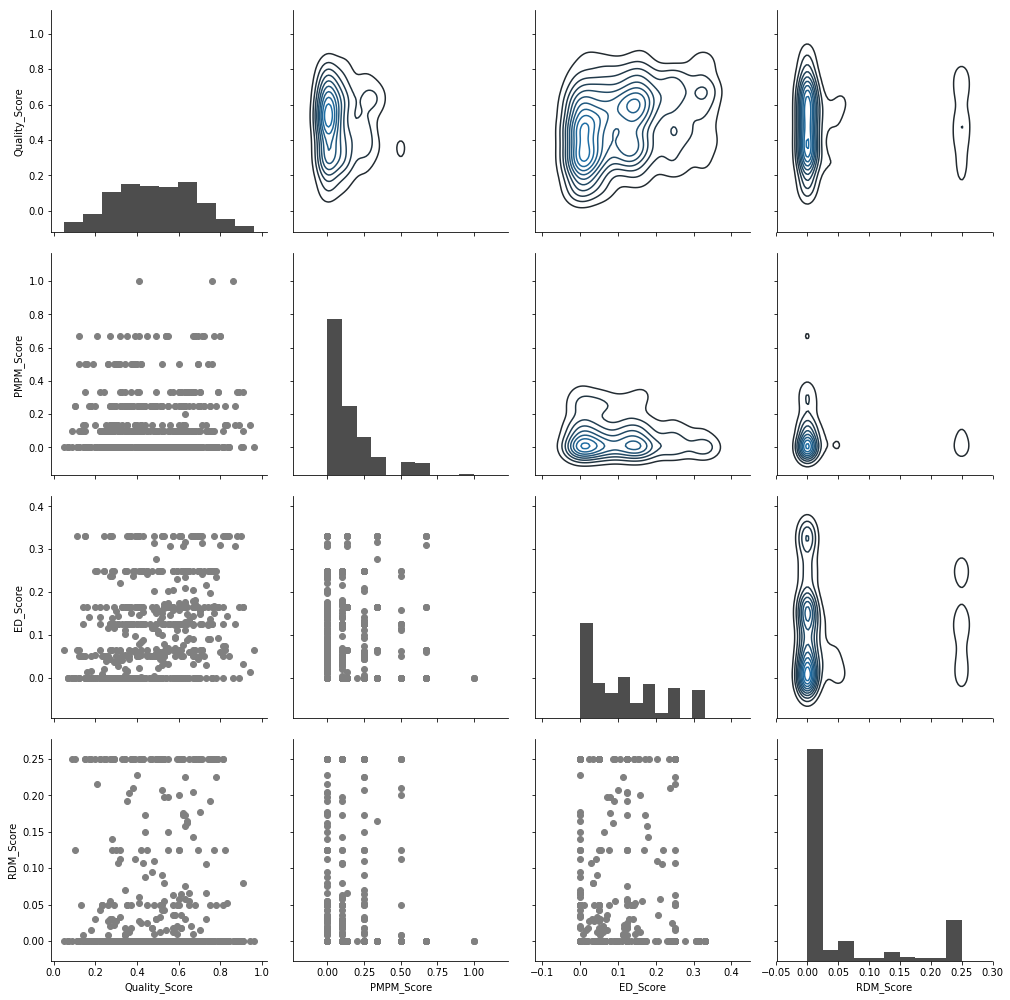

In [0]:
g = sns.PairGrid(reim, vars=['Quality_Score', 'PMPM_Score', 'ED_Score', 'RDM_Score'], height=3.5)
g.map_lower(plt.scatter, color='grey')
g.map_upper(sns.kdeplot)
g.map_diag(plt.hist, color='.3')

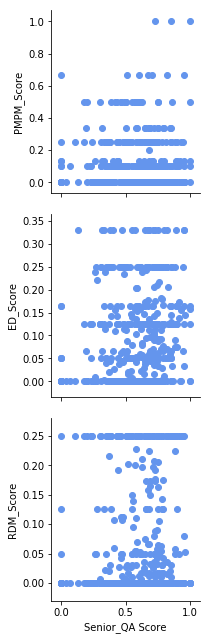

In [0]:
g = sns.PairGrid(reim, x_vars='Senior_QA Score', y_vars=['PMPM_Score', 'ED_Score', 'RDM_Score'], height=3)
g.map(plt.scatter, color='cornflowerblue')
# g.map_upper(sns.kdeplot)
# g.map_diag(plt.hist, color='.3')